In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency

## Import Data

In [2]:
loan_data = pd.read_csv('/home/chirag/Desktop/credit_risk_model-master/loan_data_2015.csv')

/home/chirag/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19,47,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



## Data Exploration

In [3]:
pd.options.display.max_columns = None
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,60516983,64537751,20000,20000,20000,36 months,12.29,667.06,C,C1,Accounting Clerk,1 year,OWN,65000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,542xx,WI,20.72,0,Sep-00,1,NaN,NaN,25,0,31578,77.0,42,w,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,52303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41000,NaN,NaN,NaN
1,60187139,64163931,11000,11000,11000,36 months,12.69,369.00,C,C2,Accounts Payable Lead,7 years,MORTGAGE,40000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,235xx,VA,24.57,0,Sep-02,0,36.0,80.0,13,1,5084,38.8,41,w,0.0,0.0,10043.49,10043.49,9942.67,100.81,0.0,0.0,0.0,Oct-15,10059.00,NaN,Jan-16,0,79.0,1,INDIVIDUAL,NaN,NaN,NaN,0,332,175731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100,NaN,NaN,NaN
2,60356453,64333218,7000,7000,7000,36 months,9.99,225.84,B,B3,Nurse,6 years,MORTGAGE,32000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,350xx,AL,32.41,0,Feb-06,1,NaN,NaN,18,0,12070,74.0,36,f,0.0,0.0,221.96,221.96,167.56,54.40,0.0,0.0,0.0,Oct-15,225.84,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,202012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16300,NaN,NaN,NaN
3,59955769,63900496,10000,10000,10000,36 months,10.99,327.34,B,B4,Service Manager,10+ years,MORTGAGE,48000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,483xx,MI,30.98,0,Oct-99,2,NaN,NaN,18,0,22950,66.0,41,f,0.0,0.0,315.13,315.13,235.76,79.37,0.0,0.0,0.0,Oct-15,327.34,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,108235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34750,NaN,NaN,NaN
4,58703693,62544456,9550,9550,9550,36 months,19.99,354.87,E,E4,NaN,NaN,RENT,32376.0,Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,546xx,WI,32.54,0,Nov-99,3,69.0,NaN,9,0,4172,29.6,26,w,0.0,0.0,333.66,333.66,195.78,137.88,0.0,0.0,0.0,Oct-15,354.87,NaN,Jan-16,0,69.0,1,INDIVIDUAL,NaN,NaN,NaN,0,0,45492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14100,NaN,NaN,NaN


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  int64  
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

In [5]:
# get a list of columns that have more than 80% null values
na_values = loan_data.isnull().mean()
na_values[na_values>0.8]

desc                         0.999893
mths_since_last_record       0.823282
annual_inc_joint             0.998786
dti_joint                    0.998791
verification_status_joint    0.998786
open_acc_6m                  0.949246
open_il_6m                   0.949246
open_il_12m                  0.949246
open_il_24m                  0.949246
mths_since_rcnt_il           0.950581
total_bal_il                 0.949246
il_util                      0.955789
open_rv_12m                  0.949246
open_rv_24m                  0.949246
max_bal_bc                   0.949246
all_util                     0.949246
inq_fi                       0.949246
total_cu_tl                  0.949246
inq_last_12m                 0.949246
dtype: float64

In [6]:

# drop columns with more than 80% null values
loan_data.dropna(thresh = loan_data.shape[0]*0.2, how = 'all', axis = 1, inplace = True)

'''
drop redundant and forward-looking columns
redundant like id, member_id, title, etc.
forward-looking like recoveries, collection_recovery_fee, etc.
drop sub_grade as same information is captured in grade column
drop next_pymnt_d since, given that our data is historical and this column is supposed to have future dates, will not make sense for our model
'''
loan_data.drop(columns = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'title', 'zip_code', 'next_pymnt_d',
                          'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee'], inplace = True)

In [7]:

# Re-explore the df
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    421094 non-null  int64  
 1   funded_amnt                  421094 non-null  int64  
 2   funded_amnt_inv              421094 non-null  int64  
 3   term                         421094 non-null  object 
 4   int_rate                     421094 non-null  float64
 5   installment                  421094 non-null  float64
 6   grade                        421094 non-null  object 
 7   emp_length                   397277 non-null  object 
 8   home_ownership               421094 non-null  object 
 9   annual_inc                   421094 non-null  float64
 10  verification_status          421094 non-null  object 
 11  issue_d                      421094 non-null  object 
 12  loan_status                  421094 non-null  object 
 13 

## Identify the target variable

In [8]:

# explore the unique values in loan_status column
loan_data['loan_status'].value_counts(normalize = True)

Current               0.896600
Fully Paid            0.054582
Issued                0.020091
Late (31-120 days)    0.011140
In Grace Period       0.007378
Charged Off           0.006585
Late (16-30 days)     0.002705
Default               0.000919
Name: loan_status, dtype: float64

In [9]:
# create a new column based on the loan_status column that will be our target variable
loan_data['good_bad'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
loan_data.drop(columns = ['loan_status'], inplace = True)

## Split Data

In [10]:
# split data into 80/20 while keeping the distribution of bad loans in test set same as that in the pre-split dataset
X = loan_data.drop('good_bad', axis = 1)
y = loan_data['good_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# specifically hard copying the training sets to avoid Pandas' SetttingWithCopyWarning when we play around with this data later on.
# as noted [here](https://github.com/scikit-learn/scikit-learn/issues/8723), this is currently an open issue between Pandas and Scikit-Learn teams
X_train, X_test = X_train.copy(), X_test.copy()

## General Data Cleaning

#### emp_length

In [11]:
# create a helper function clean up the emp_length column, assign 0 to NANs, and convert to numeric
def emp_length_converter(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)

# apply to X_train
emp_length_converter(X_train, 'emp_length')

# Confirm our transformation
X_train['emp_length'].unique()

/tmp/ipykernel_47707/4119936878.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\+ years', '')


array([10.,  2.,  6.,  1.,  3.,  4.,  8.,  9.,  0.,  5.,  7.])

#### date columns

In [12]:

# convert date columns to datetime format and create a new column as a difference between today and the respective date
def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)

# apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')

# let's check these new columns
print(X_train['mths_since_earliest_cr_line'].describe())
print(X_train['mths_since_issue_d'].describe())
print(X_train['mths_since_last_pymnt_d'].describe())
print(X_train['mths_since_last_credit_pull_d'].describe())

count    336875.000000
mean        262.388435
std          90.717277
min          93.000000
25%         200.000000
50%         244.000000
75%         310.000000
max         619.000000
Name: mths_since_earliest_cr_line, dtype: float64
count    336875.000000
mean         61.045171
std           3.455841
min          56.000000
25%          58.000000
50%          61.000000
75%          64.000000
max          67.000000
Name: mths_since_issue_d, dtype: float64
count    322988.000000
mean         55.508242
std           1.292614
min          55.000000
25%          55.000000
50%          55.000000
75%          56.000000
max          67.000000
Name: mths_since_last_pymnt_d, dtype: float64
count    336865.000000
mean         55.152497
std           0.897343
min          55.000000
25%          55.000000
50%          55.000000
75%          55.000000
max          68.000000
Name: mths_since_last_credit_pull_d, dtype: float64


#### term

In [13]:
# function to remove 'months' string from the 'term' column and convert it to numeric
def loan_term_converter(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))

loan_term_converter(X_train, 'term')

## Feature Selection

In [14]:
# first divide training data into categorical and numerical subsets
X_train_cat = X_train.select_dtypes(include = 'object').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()


### Chi-squared statistic for categorical features

In [15]:

# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

,Feature,p-value
0,grade,0.000000
1,home_ownership,0.000000
2,verification_status,0.000000
3,purpose,0.000000
4,addr_state,0.000000
5,initial_list_status,0.000000
6,application_type,0.028142
7,pymnt_plan,1.000000


Let's keep only the top four categorical features

In [16]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
X_train_num.fillna(X_train_num.mean(), inplace = True)
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_train_num, y_train)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

/home/chirag/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/chirag/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Numerical_Feature,F-Score,p values
0,mths_since_last_pymnt_d,48151.262635,0.000000e+00
1,mths_since_issue_d,5022.870198,0.000000e+00
2,int_rate,4335.700503,0.000000e+00
3,out_prncp,1302.251647,0.000000e+00
4,out_prncp_inv,1302.222886,0.000000e+00
5,inq_last_6mths,525.882831,0.000000e+00
6,mths_since_last_credit_pull_d,464.505497,0.000000e+00
7,total_pymnt,211.946776,0.000000e+00
8,total_pymnt_inv,211.869294,0.000000e+00
9,last_pymnt_amnt,206.562975,0.000000e+00


#### Pair wise correlations to detect multicollinearity

/tmp/ipykernel_47707/2547628764.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corrmat, dtype=np.bool))


Text(0.5, 1.0, 'Pearson correlation')

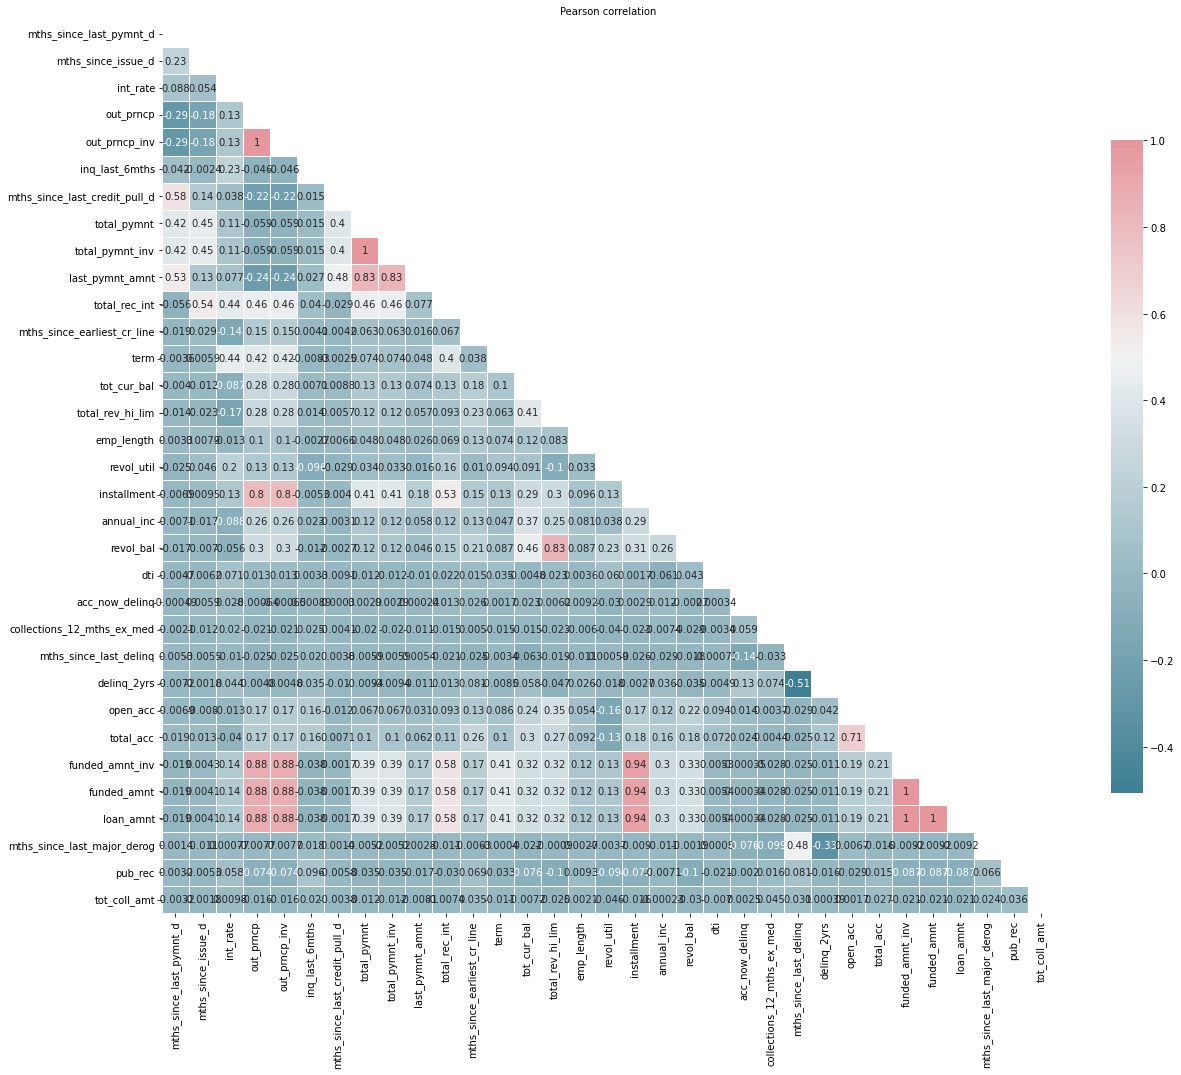

In [17]:
# save the top 20 numerical features in a list
top_num_features = ANOVA_F_table.iloc[:33,0].to_list()
# calculate pair-wise correlations between them
corrmat = X_train_num[top_num_features].corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corrmat, cmap= cmap, mask= mask, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True)

plt.title("Pearson correlation", fontsize =10)


The following features can also be safely dropped given their multicollinearity with other features:

-out_prncp_inv
-total_pymnt_inv

In [18]:
# Define a helper function to drop the 4 categorical features with least p-values for chi squared test, 14 numerical features with least F-Statistic
# and 2 numerical features with high multicollinearity
drop_columns_list = ANOVA_F_table.iloc[33:, 0].to_list()
drop_columns_list.extend(chi2_result.iloc[4:, 0].to_list())
drop_columns_list.extend(['out_prncp_inv', 'total_pymnt_inv','funded_amnt','funded_amnt_inv'])

def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

# apply to X_train
col_to_drop(X_train, drop_columns_list)

## Creating Dummy Variables

#### Convert discrete variables to dummy variables

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336875 entries, 304531 to 312076
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      336875 non-null  int64  
 1   term                           336875 non-null  int64  
 2   int_rate                       336875 non-null  float64
 3   installment                    336875 non-null  float64
 4   grade                          336875 non-null  object 
 5   emp_length                     336875 non-null  float64
 6   home_ownership                 336875 non-null  object 
 7   annual_inc                     336875 non-null  float64
 8   verification_status            336875 non-null  object 
 9   purpose                        336875 non-null  object 
 10  dti                            336875 non-null  float64
 11  delinq_2yrs                    336875 non-null  int64  
 12  inq_last_6mths           

In [20]:
# function to create dummy variables
def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col, prefix_sep = ':'))
    df_dummies = pd.concat(df_dummies, axis = 1)
    df = pd.concat([df, df_dummies], axis = 1)
    return df

# apply to our final four categorical variables
X_train = dummy_creation(X_train, ['grade', 'home_ownership', 'verification_status', 'purpose'])

## Update the test data set with all data cleaning procedures performed so far

In [21]:
emp_length_converter(X_test, 'emp_length')
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')
loan_term_converter(X_test, 'term')
col_to_drop(X_test, drop_columns_list)
X_test = dummy_creation(X_test, ['grade', 'home_ownership', 'verification_status', 'purpose'])
# reindex the dummied test set variables to make sure all the feature columns in the train set are also available in the test set
X_test = X_test.reindex(labels=X_train.columns, axis=1, fill_value=0)

/tmp/ipykernel_47707/4119936878.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\+ years', '')


## WoE Binning/Feature Engineering

We will analyze both categorical and numerical features based on their categorical/binned WoEs and IVs and then combine some of these binned categories together through a custom Python Class with fit_transform method

In [22]:
# Create copies of the 4 training sets to be preprocessed using WoE
X_train_prepr = X_train.copy()
y_train_prepr = y_train.copy()
X_test_prepr = X_test.copy()
y_test_prepr = y_test.copy()

### Analyze WoEs and IVs of discrete features

In [23]:
# The function takes 3 arguments: a dataframe (X_train_prepr), a string (column name), and a dataframe (y_train_prepr).
# The function returns a dataframe as a result.
def woe_discrete(df, cat_variabe_name, y_df):
    df = pd.concat([df[cat_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [24]:
# We set the default style of the graphs to the seaborn style. 
sns.set()
# Below we define a function for plotting WoE across categories that takes 2 arguments: a dataframe and a number.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

#### Grade

In [25]:
df_temp = woe_discrete(X_train_prepr, 'grade', y_train_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,1743,0.901893,0.005174,1572.0,171.0,0.004755,0.027225,-1.744921,NaN,NaN,0.632238
1,F,7869,0.932647,0.023359,7339.0,530.0,0.022199,0.084381,-1.335281,0.030754,0.409640,0.632238
2,E,27998,0.956604,0.083111,26783.0,1215.0,0.081015,0.193441,-0.870339,0.023957,0.464942,0.632238
3,D,50148,0.967496,0.148862,48518.0,1630.0,0.146760,0.259513,-0.570007,0.010892,0.300332,0.632238
4,C,96501,0.982601,0.286459,94822.0,1679.0,0.286823,0.267314,0.070441,0.015105,0.640448,0.632238
5,B,93959,0.991007,0.278914,93114.0,845.0,0.281657,0.134533,0.738881,0.008405,0.668440,0.632238
6,A,58657,0.996403,0.174121,58446.0,211.0,0.176791,0.033593,1.660639,0.005396,0.921757,0.632238


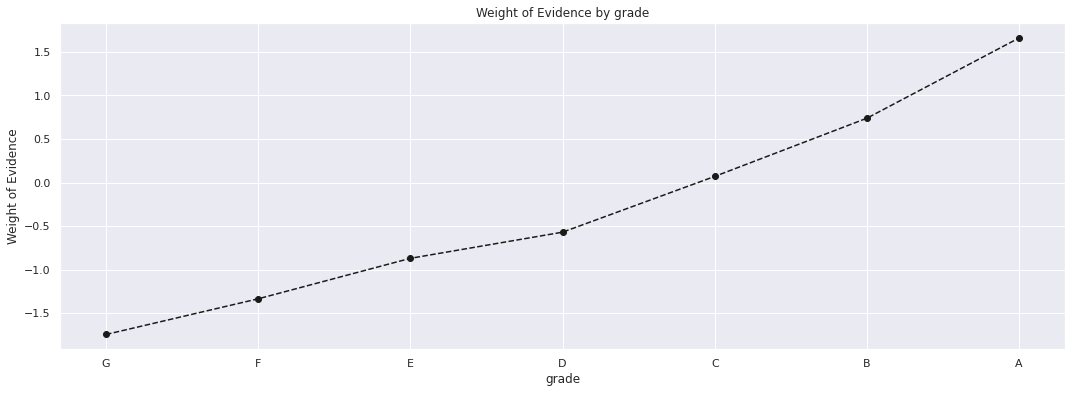

In [26]:
plot_by_woe(df_temp)


We can see from the above graph that there is a continuous increase in WoE across the different grades. Therefore, we do not need to combine any features together and should leave all these 7 grades as they are

Note that there are no missing values in the grade column, otherwise we would have created a separate and independent category for all Missing values, that would never be combined with any other category. We will come across this scenario when working through other features

#### home_ownership

In [27]:
df_temp = woe_discrete(X_train_prepr, 'home_ownership', y_train_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,RENT,134297,0.976984,0.398655,131206.0,3091.0,0.396880,0.492119,-0.215088,NaN,NaN,inf
1,OWN,36571,0.981379,0.108560,35890.0,681.0,0.108562,0.108422,0.001290,0.004395,0.216378,inf
2,MORTGAGE,166005,0.984886,0.492779,163496.0,2509.0,0.494552,0.399459,0.213542,0.003507,0.212253,inf
3,ANY,2,1.000000,0.000006,2.0,0.0,0.000006,0.000000,inf,0.015114,inf,inf


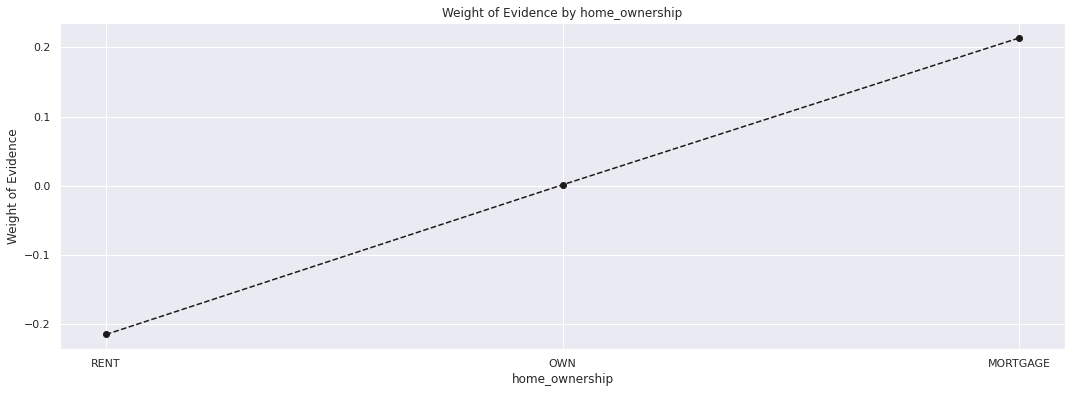

In [28]:
plot_by_woe(df_temp)

#### verification status

In [29]:
df_temp = woe_discrete(X_train_prepr, 'verification_status', y_train_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,98338,0.976632,0.291912,96040.0,2298.0,0.290507,0.365865,-0.230636,NaN,NaN,0.046138
1,Source Verified,143639,0.981036,0.426387,140915.0,2724.0,0.426248,0.433689,-0.017306,0.004404,0.213330,0.046138
2,Not Verified,94898,0.986733,0.281701,93639.0,1259.0,0.283245,0.200446,0.345767,0.005697,0.363074,0.046138


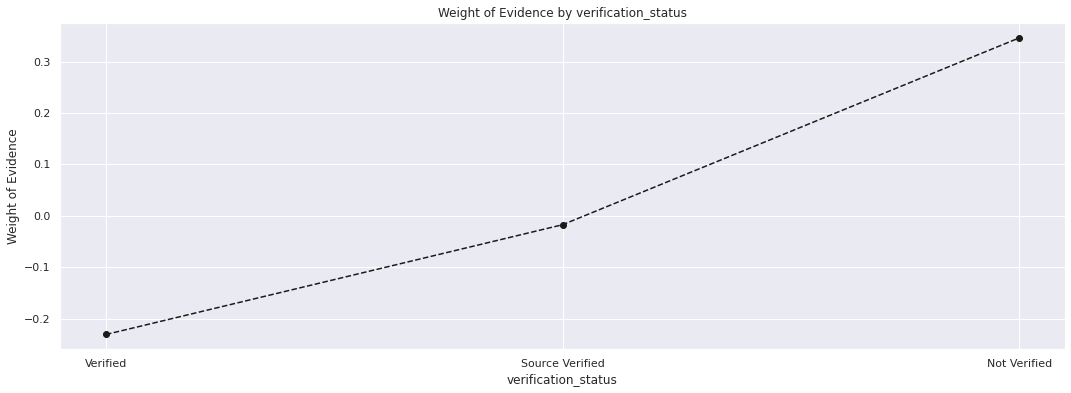

In [30]:
plot_by_woe(df_temp)


#### purpose

In [31]:
df_temp = woe_discrete(X_train_prepr, 'purpose', y_train_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,wedding,3,0.666667,0.000009,2.0,1.0,0.000006,0.000159,-3.270215,NaN,NaN,inf
1,renewable_energy,182,0.961538,0.000540,175.0,7.0,0.000529,0.001114,-0.744486,0.294872,2.525729,inf
2,small_business,2705,0.961553,0.008030,2601.0,104.0,0.007868,0.016558,-0.744101,0.000014,0.000385,inf
3,moving,1935,0.963824,0.005744,1865.0,70.0,0.005641,0.011145,-0.680841,0.002272,0.063261,inf
4,house,1146,0.972077,0.003402,1114.0,32.0,0.003370,0.005095,-0.413385,0.008252,0.267455,inf
5,medical,3179,0.972318,0.009437,3091.0,88.0,0.009350,0.014011,-0.404449,0.000242,0.008937,inf
6,major_purchase,5974,0.975561,0.017734,5828.0,146.0,0.017629,0.023245,-0.276539,0.003242,0.127909,inf
7,other,15428,0.977120,0.045797,15075.0,353.0,0.045600,0.056201,-0.209037,0.001559,0.067502,inf
8,vacation,1769,0.979650,0.005251,1733.0,36.0,0.005242,0.005732,-0.089271,0.002530,0.119765,inf
9,debt_consolidation,199960,0.979761,0.593573,195913.0,4047.0,0.592609,0.644324,-0.083667,0.000111,0.005604,inf


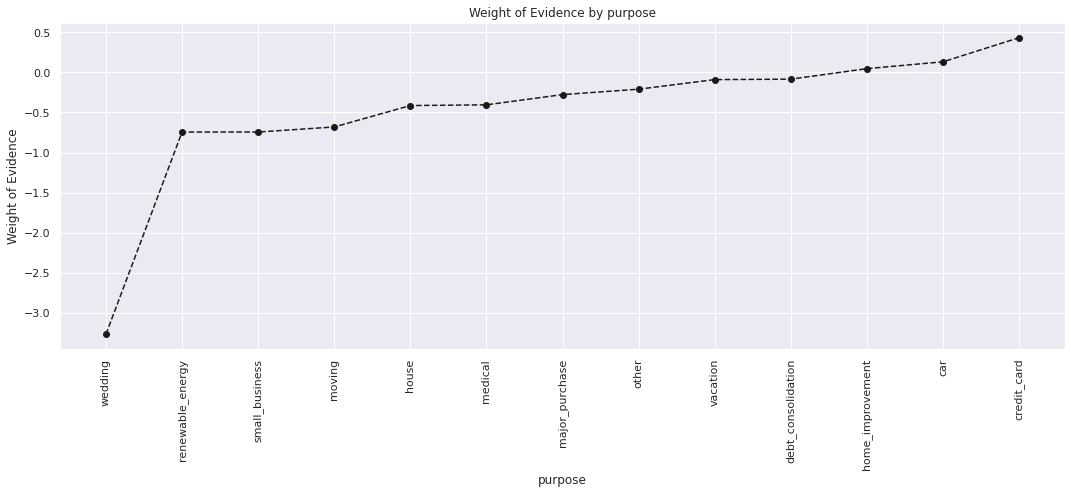

In [32]:
plot_by_woe(df_temp, 90)

### Analyze WoEs and IVs of numeric features

In [33]:
# We define a function to calculate WoE of continuous variables. This is same as the function we defined earlier for discrete variables.
# The only difference are the 2 commented lines of code in the function that results in the df being sorted by continuous variable values
def woe_ordered_continuous(df, continuous_variabe_name, y_df):
    df = pd.concat([df[continuous_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

#### term

In [34]:
df_temp = woe_ordered_continuous(X_train_prepr, 'term', y_train_prepr)
df_temp

,term,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,226487,0.983434,0.672318,222735.0,3752.0,0.673742,0.597357,0.120332,NaN,NaN,0.02526
1,60,110388,0.977090,0.327682,107859.0,2529.0,0.326258,0.402643,-0.210361,0.006344,0.330693,0.02526


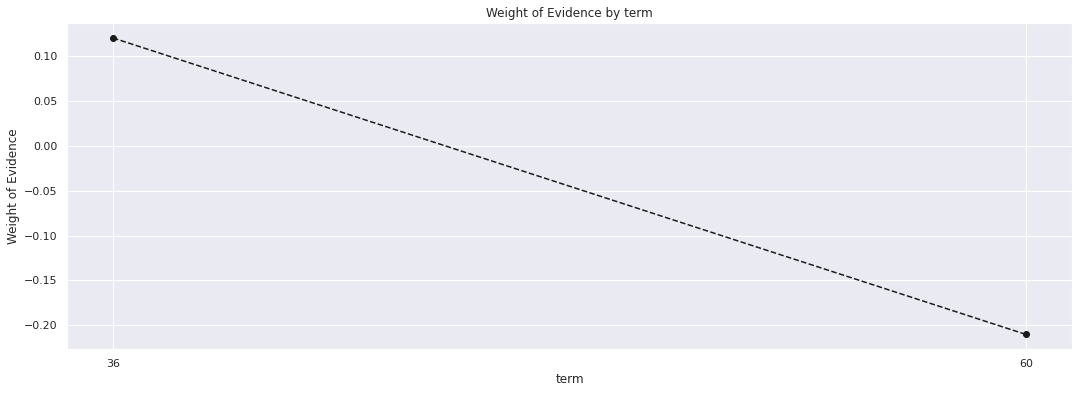

In [35]:
plot_by_woe(df_temp)

#### int_rate_factor

In [36]:
# fine-classing using the 'cut' method, given the large number of unique values
X_train_prepr['int_rate_factor'] = pd.cut(X_train_prepr['int_rate'], 50)
# Process 'int_rate_factor' column through woe_ordered_continuous and plot_by_woe functions
df_temp = woe_ordered_continuous(X_train_prepr, 'int_rate_factor', y_train_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.296, 5.793]",7803,0.999616,0.023163,7800.0,3.0,0.023594,0.000478,3.899905,NaN,NaN,inf
1,"(5.793, 6.267]",8159,0.997671,0.024220,8140.0,19.0,0.024622,0.003025,2.096745,0.001944,1.803160,inf
2,"(6.267, 6.74]",5249,0.993904,0.015581,5217.0,32.0,0.015781,0.005095,1.130580,0.003768,0.966165,inf
3,"(6.74, 7.214]",9956,0.995380,0.029554,9910.0,46.0,0.029976,0.007324,1.409296,0.001476,0.278716,inf
4,"(7.214, 7.687]",9068,0.997905,0.026918,9049.0,19.0,0.027372,0.003025,2.202609,0.002525,0.793312,inf
5,"(7.687, 8.16]",16496,0.995938,0.048968,16429.0,67.0,0.049695,0.010667,1.538749,0.001966,0.663860,inf
6,"(8.16, 8.634]",17998,0.993944,0.053426,17889.0,109.0,0.054112,0.017354,1.137232,0.001995,0.401517,inf
7,"(8.634, 9.107]",1596,0.981203,0.004738,1566.0,30.0,0.004737,0.004776,-0.008279,0.012741,1.145511,inf
8,"(9.107, 9.581]",17763,0.992625,0.052729,17632.0,131.0,0.053334,0.020857,0.938912,0.011422,0.947191,inf
9,"(9.581, 10.054]",17811,0.993543,0.052871,17696.0,115.0,0.053528,0.018309,1.072800,0.000918,0.133888,inf


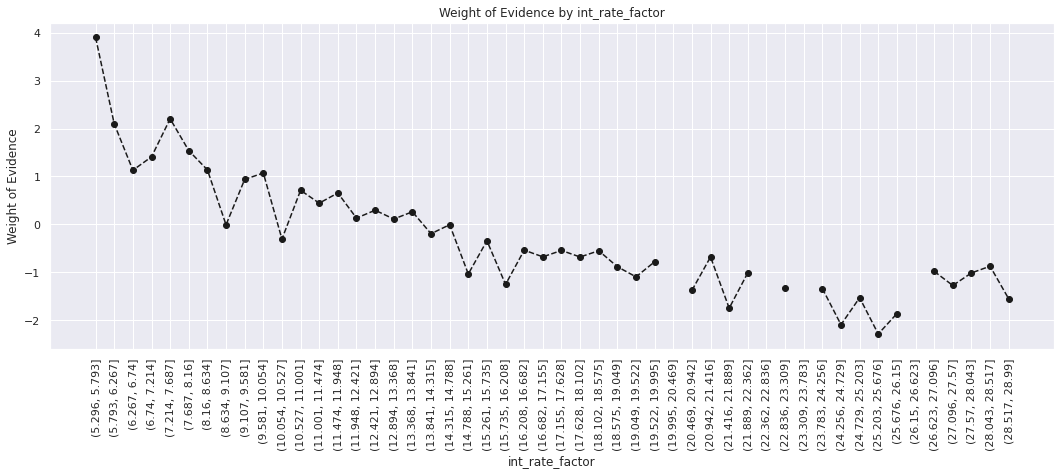

In [37]:
plot_by_woe(df_temp, 90)

#### emp_length

In [38]:
df_temp = woe_ordered_continuous(X_train_prepr, 'emp_length', y_train_prepr)
df_temp

,emp_length,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,46622,0.978015,0.138396,45597.0,1025.0,0.137924,0.163191,-0.168213,NaN,NaN,0.018411
1,1.0,21900,0.978219,0.065009,21423.0,477.0,0.064802,0.075943,-0.158658,0.000205,0.009555,0.018411
2,2.0,30073,0.980680,0.089271,29492.0,581.0,0.089209,0.092501,-0.036238,0.002461,0.122420,0.018411
3,3.0,26659,0.981095,0.079136,26155.0,504.0,0.079115,0.080242,-0.014142,0.000414,0.022096,0.018411
4,4.0,19663,0.979301,0.058369,19256.0,407.0,0.058247,0.064799,-0.106597,0.001793,0.092455,0.018411
5,5.0,19918,0.981123,0.059126,19542.0,376.0,0.059112,0.059863,-0.012630,0.001821,0.093967,0.018411
6,6.0,13555,0.978975,0.040237,13270.0,285.0,0.040140,0.045375,-0.122590,0.002148,0.109960,0.018411
7,7.0,14735,0.978215,0.043740,14414.0,321.0,0.043600,0.051107,-0.158848,0.000759,0.036258,0.018411
8,8.0,17211,0.984080,0.051090,16937.0,274.0,0.051232,0.043624,0.160766,0.005865,0.319614,0.018411
9,9.0,13430,0.982427,0.039866,13194.0,236.0,0.039910,0.037574,0.060324,0.001653,0.100442,0.018411


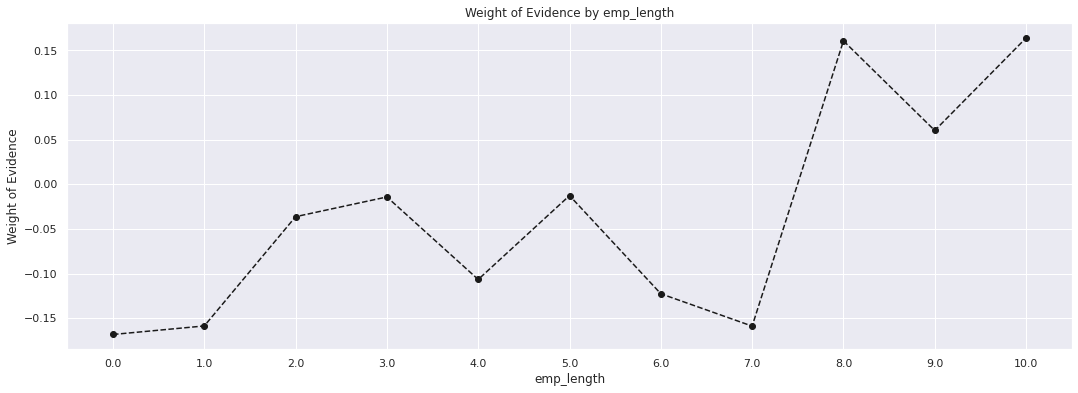

In [39]:
plot_by_woe(df_temp)


We will not use this feature for the following reasons:

very low IV
WoE ranges between a very small range, implying low power of differentiating between good and bad loans

#### annual_inc_factor

In [40]:
# fine-classing
X_train_prepr['annual_inc_factor'] = pd.cut(X_train_prepr['annual_inc'], 50)
# Process 'annual_inc_factor' column through woe_ordered_continuous and plot_by_woe functions
df_temp = woe_ordered_continuous(X_train_prepr, 'annual_inc_factor', y_train_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9500.0, 190000.0]",327833,0.981198,0.973159,321669.0,6164.0,0.973003,0.981372,-0.008565,NaN,NaN,inf
1,"(190000.0, 380000.0]",7931,0.986004,0.023543,7820.0,111.0,0.023654,0.017672,0.291548,0.004807,0.300112,inf
2,"(380000.0, 570000.0]",743,0.993271,0.002206,738.0,5.0,0.002232,0.000796,1.031144,0.007266,0.739596,inf
3,"(570000.0, 760000.0]",213,1.000000,0.000632,213.0,0.0,0.000644,0.000000,inf,0.006729,inf,inf
4,"(760000.0, 950000.0]",61,1.000000,0.000181,61.0,0.0,0.000185,0.000000,inf,0.000000,NaN,inf
5,"(950000.0, 1140000.0]",35,1.000000,0.000104,35.0,0.0,0.000106,0.000000,inf,0.000000,NaN,inf
6,"(1140000.0, 1330000.0]",13,1.000000,0.000039,13.0,0.0,0.000039,0.000000,inf,0.000000,NaN,inf
7,"(1330000.0, 1520000.0]",9,1.000000,0.000027,9.0,0.0,0.000027,0.000000,inf,0.000000,NaN,inf
8,"(1520000.0, 1710000.0]",2,1.000000,0.000006,2.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf
9,"(1710000.0, 1900000.0]",3,1.000000,0.000009,3.0,0.0,0.000009,0.000000,inf,0.000000,NaN,inf


In [41]:
# Initial examination shows that there are too few individuals with large income (up to $75m!!) and too many with small income.
# Since 95.6% of observations have income < 151,858, we will have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
X_train_prepr_temp = X_train_prepr[X_train_prepr['annual_inc'] <= 150000].copy()
# fine-classing again
X_train_prepr_temp['annual_inc_factor'] = pd.cut(X_train_prepr_temp['annual_inc'], 50)
# make sure to select only the relevant indexes in the target column
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'annual_inc_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-150.0, 3000.0]",5,1.000000,0.000016,5.0,0.0,0.000016,0.000000,inf,NaN,NaN,inf
1,"(3000.0, 6000.0]",14,0.928571,0.000044,13.0,1.0,0.000042,0.000166,-1.384886,0.071429,inf,inf
2,"(6000.0, 9000.0]",87,0.988506,0.000273,86.0,1.0,0.000275,0.000166,0.504512,0.059934,1.889398,inf
3,"(9000.0, 12000.0]",524,0.971374,0.001644,509.0,15.0,0.001627,0.002490,-0.425437,0.017132,0.929949,inf
4,"(12000.0, 15000.0]",944,0.975636,0.002961,921.0,23.0,0.002944,0.003818,-0.259869,0.004262,0.165568,inf
5,"(15000.0, 18000.0]",1375,0.970182,0.004313,1334.0,41.0,0.004265,0.006806,-0.467470,0.005454,0.207601,inf
6,"(18000.0, 21000.0]",2511,0.971724,0.007876,2440.0,71.0,0.007800,0.011786,-0.412761,0.001543,0.054708,inf
7,"(21000.0, 24000.0]",3540,0.974859,0.011103,3451.0,89.0,0.011032,0.014774,-0.292052,0.003134,0.120710,inf
8,"(24000.0, 27000.0]",5431,0.974222,0.017034,5291.0,140.0,0.016915,0.023240,-0.317715,0.000637,0.025663,inf
9,"(27000.0, 30000.0]",8825,0.975071,0.027679,8605.0,220.0,0.027509,0.036521,-0.283364,0.000849,0.034351,inf


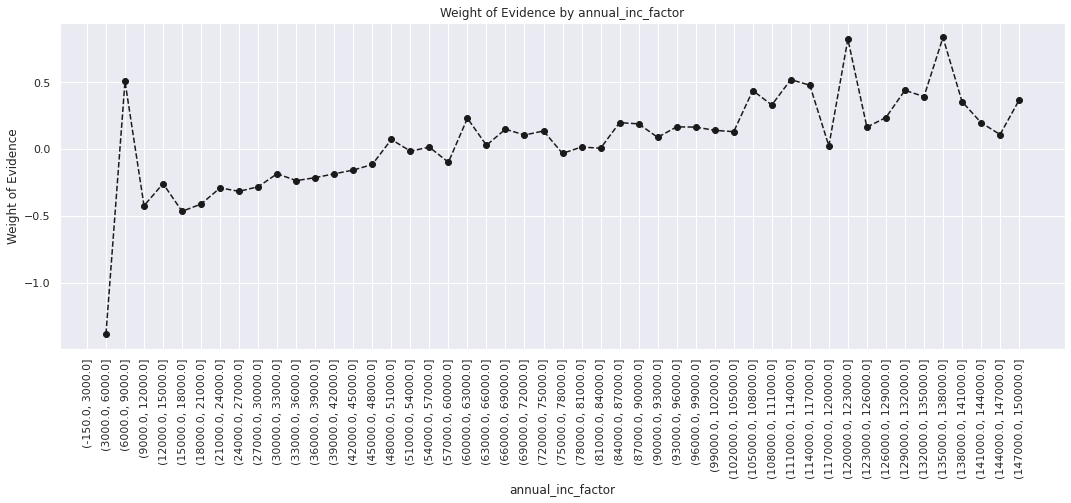

In [42]:
plot_by_woe(df_temp, 90)

In [43]:
X_train_prepr_temp = X_train_prepr[X_train_prepr['dti'] <= 42].copy()
# fine-classing
X_train_prepr_temp['dti_factor'] = pd.cut(X_train_prepr_temp['dti'], 50)
# Process 'annual_inc_factor' column through woe_ordered_continuous and plot_by_woe functions
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'dti_factor', y_train_prepr)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.0419, 0.839]",715,0.974825,0.002123,697.0,18.0,0.002109,0.002866,-0.306779,NaN,NaN,inf
1,"(0.839, 1.678]",1176,0.983844,0.003491,1157.0,19.0,0.003500,0.003025,0.145954,0.009018,0.452733,inf
2,"(1.678, 2.516]",1758,0.982935,0.005219,1728.0,30.0,0.005228,0.004776,0.090330,0.000908,0.055624,inf
3,"(2.516, 3.355]",2532,0.983017,0.007517,2489.0,43.0,0.007530,0.006846,0.095244,0.000082,0.004914,inf
4,"(3.355, 4.194]",3263,0.984064,0.009688,3211.0,52.0,0.009714,0.008279,0.159902,0.001046,0.064658,inf
5,"(4.194, 5.033]",3872,0.987087,0.011496,3822.0,50.0,0.011563,0.007961,0.373314,0.003023,0.213412,inf
6,"(5.033, 5.872]",4916,0.987185,0.014595,4853.0,63.0,0.014682,0.010030,0.381025,0.000098,0.007712,inf
7,"(5.872, 6.71]",5540,0.986462,0.016448,5465.0,75.0,0.016534,0.011941,0.325439,0.000723,0.055586,inf
8,"(6.71, 7.549]",6270,0.986284,0.018615,6184.0,86.0,0.018709,0.013692,0.312181,0.000178,0.013258,inf
9,"(7.549, 8.388]",7188,0.983445,0.021341,7069.0,119.0,0.021386,0.018946,0.121158,0.002839,0.191022,inf


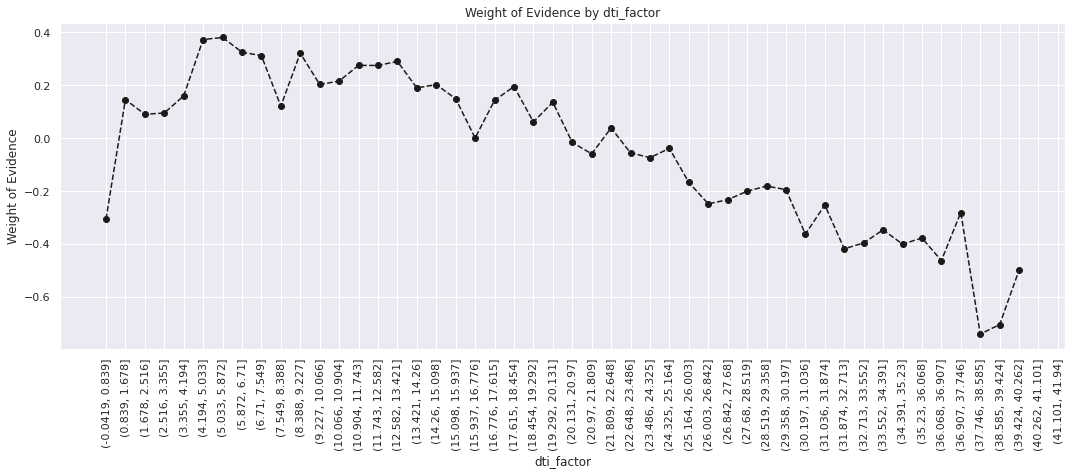

In [44]:
plot_by_woe(df_temp, 90)

#### inq_last_6mths

In [45]:
df_temp = woe_ordered_continuous(X_train_prepr, 'inq_last_6mths', y_train_prepr)
df_temp

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,205034,0.985002,0.608635,201959.0,3075.0,0.610897,0.489572,0.221398,NaN,NaN,0.074358
1,1,89056,0.978272,0.264359,87121.0,1935.0,0.263529,0.308072,-0.156171,0.006730,0.377569,0.074358
2,2,29108,0.973203,0.086406,28328.0,780.0,0.085688,0.124184,-0.371050,0.005069,0.214879,0.074358
3,3,9848,0.964968,0.029233,9503.0,345.0,0.028745,0.054928,-0.647543,0.008236,0.276494,0.074358
4,4,2818,0.965224,0.008365,2720.0,98.0,0.008228,0.015603,-0.639942,0.000256,0.007601,0.074358
5,5,980,0.953061,0.002909,934.0,46.0,0.002825,0.007324,-0.952527,0.012162,0.312585,0.074358
6,6,31,0.935484,0.000092,29.0,2.0,0.000088,0.000318,-1.289213,0.017577,0.336686,0.074358


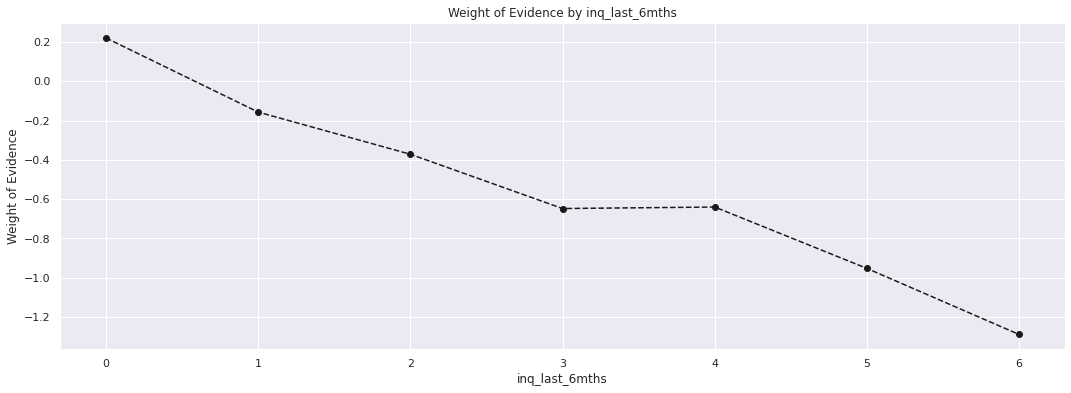

In [46]:
plot_by_woe(df_temp)

#### revol_util

In [47]:
# Initial examination shows that there are some obs with utilization of >1 times which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['revol_util'] <= 1].copy()
# fine-classing
X_train_prepr_temp['revol_util_factor'] = pd.cut(X_train_prepr_temp['revol_util'], 10)
# preprocess 'revol_util'
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'revol_util_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,revol_util_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 0.1]",1157,0.974935,0.582578,1128.0,29.0,0.582645,0.58,0.004549,NaN,NaN,0.056447
1,"(0.1, 0.2]",102,0.980392,0.051360,100.0,2.0,0.051653,0.04,0.255667,0.005457,0.251117,0.056447
2,"(0.2, 0.3]",107,0.981308,0.053877,105.0,2.0,0.054236,0.04,0.304457,0.000916,0.048790,0.056447
3,"(0.3, 0.4]",78,0.974359,0.039275,76.0,2.0,0.039256,0.04,-0.018770,0.006949,0.323227,0.056447
4,"(0.4, 0.5]",114,0.973684,0.057402,111.0,3.0,0.057335,0.06,-0.045438,0.000675,0.026668,0.056447
5,"(0.5, 0.6]",84,0.988095,0.042296,83.0,1.0,0.042872,0.02,0.762484,0.014411,0.807923,0.056447
6,"(0.6, 0.7]",84,0.964286,0.042296,81.0,3.0,0.041839,0.06,-0.360519,0.023810,1.123004,0.056447
7,"(0.7, 0.8]",91,0.967033,0.045821,88.0,3.0,0.045455,0.06,-0.277632,0.002747,0.082888,0.056447
8,"(0.8, 0.9]",67,0.985075,0.033736,66.0,1.0,0.034091,0.02,0.533298,0.018042,0.810930,0.056447
9,"(0.9, 1.0]",102,0.960784,0.051360,98.0,4.0,0.050620,0.08,-0.457683,0.024290,0.990982,0.056447


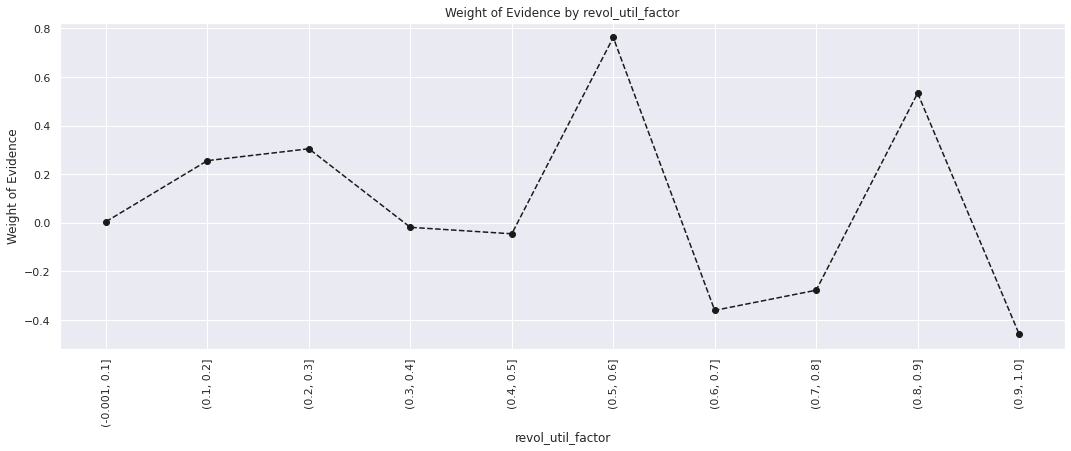

In [48]:
plot_by_woe(df_temp, 90)

#### total_acc

In [49]:
# Initial examination shows that there are some obs >50 accounts which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_acc'] <= 50].copy()
# fine-classing
X_train_prepr_temp['total_acc_factor'] = pd.cut(X_train_prepr_temp['total_acc'], 20)
# preprocess 'total_acc'
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_acc_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3.954, 6.3]",5475,0.978447,0.016869,5357.0,118.0,0.016819,0.019494,-0.147625,NaN,NaN,0.006664
1,"(6.3, 8.6]",8097,0.977893,0.024947,7918.0,179.0,0.024860,0.029572,-0.173592,0.000554,0.025967,0.006664
2,"(8.6, 10.9]",12179,0.980622,0.037524,11943.0,236.0,0.037496,0.038989,-0.039031,0.002729,0.134561,0.006664
3,"(10.9, 13.2]",25201,0.979604,0.077646,24687.0,514.0,0.077508,0.084917,-0.091291,0.001018,0.052260,0.006664
4,"(13.2, 15.5]",20233,0.980082,0.062339,19830.0,403.0,0.062259,0.066579,-0.067085,0.000478,0.024206,0.006664
5,"(15.5, 17.8]",22381,0.980072,0.068957,21935.0,446.0,0.068868,0.073682,-0.067580,0.000010,0.000495,0.006664
6,"(17.8, 20.1]",35721,0.982559,0.110059,35098.0,623.0,0.110194,0.102924,0.068253,0.002487,0.135833,0.006664
7,"(20.1, 22.4]",24194,0.982392,0.074543,23768.0,426.0,0.074622,0.070378,0.058556,0.000167,0.009697,0.006664
8,"(22.4, 24.7]",23343,0.980808,0.071921,22895.0,448.0,0.071882,0.074013,-0.029219,0.001584,0.087775,0.006664
9,"(24.7, 27.0]",32718,0.981111,0.100806,32100.0,618.0,0.100782,0.102098,-0.012977,0.000303,0.016242,0.006664


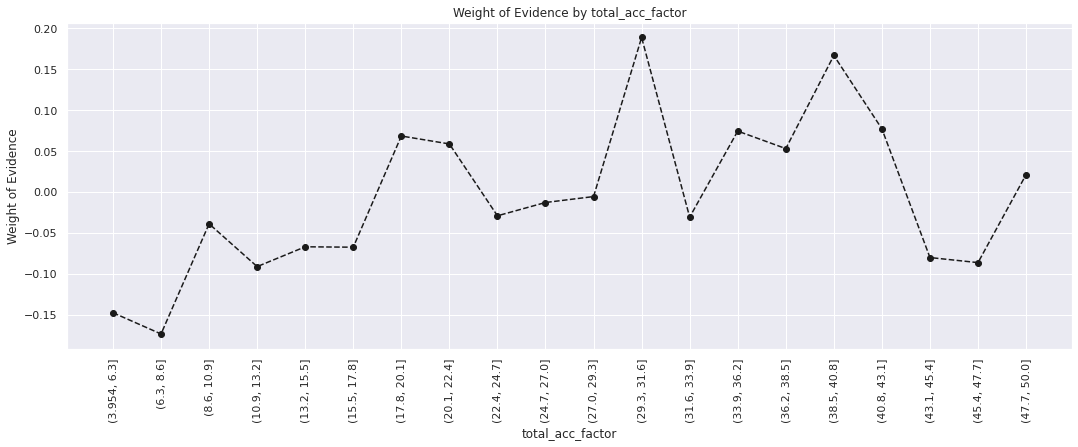

In [50]:

plot_by_woe(df_temp, 90)

#### out_prncp

In [51]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories by its values.
X_train_prepr['out_prncp_factor'] = pd.cut(X_train_prepr['out_prncp'], 25)
# We calculate weight of evidence.
df_temp = woe_ordered_continuous(X_train_prepr, 'out_prncp_factor', y_train_prepr)
df_temp

,out_prncp_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-49.373, 1974.914]",26482,0.912167,0.078611,24156.0,2326.0,0.073068,0.370323,-1.622979,NaN,NaN,inf
1,"(1974.914, 3949.829]",18014,0.989286,0.053474,17821.0,193.0,0.053906,0.030728,0.562081,0.077119,2.185060,inf
2,"(3949.829, 5924.743]",32464,0.988295,0.096368,32084.0,380.0,0.097050,0.060500,0.472580,0.000991,0.089501,inf
3,"(5924.743, 7899.658]",30677,0.988265,0.091063,30317.0,360.0,0.091705,0.057316,0.469998,0.000030,0.002582,inf
4,"(7899.658, 9874.572]",35435,0.987611,0.105187,34996.0,439.0,0.105858,0.069893,0.415128,0.000654,0.054870,inf
5,"(9874.572, 11849.486]",32265,0.985991,0.095777,31813.0,452.0,0.096230,0.071963,0.290586,0.001620,0.124542,inf
6,"(11849.486, 13824.401]",25678,0.985747,0.076224,25312.0,366.0,0.076565,0.058271,0.273039,0.000244,0.017548,inf
7,"(13824.401, 15799.315]",27362,0.988451,0.081223,27046.0,316.0,0.081810,0.050310,0.486190,0.002705,0.213152,inf
8,"(15799.315, 17774.23]",19514,0.987189,0.057927,19264.0,250.0,0.058271,0.039803,0.381171,0.001262,0.105020,inf
9,"(17774.23, 19749.144]",20833,0.986128,0.061842,20544.0,289.0,0.062143,0.046012,0.300536,0.001061,0.080635,inf


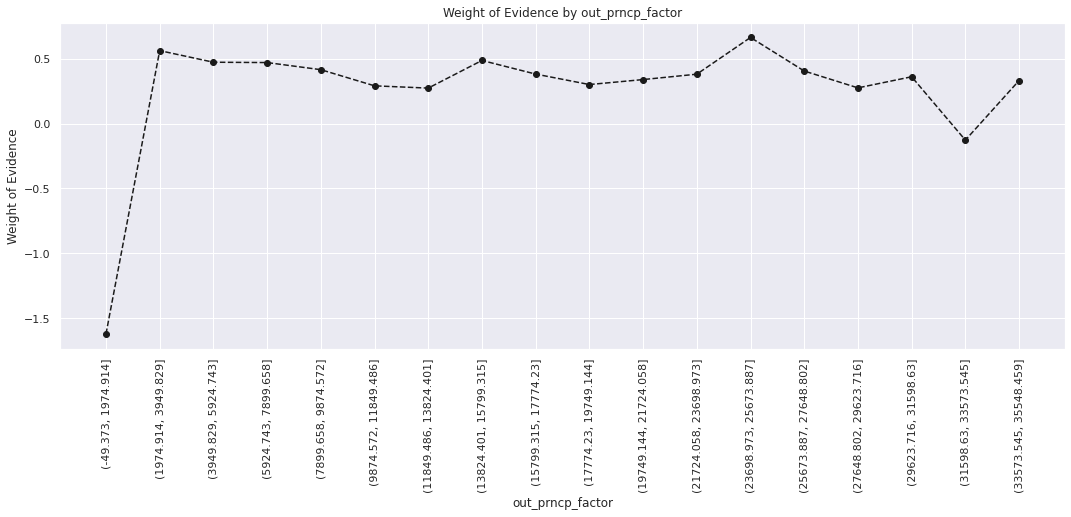

In [52]:
plot_by_woe(df_temp,90)

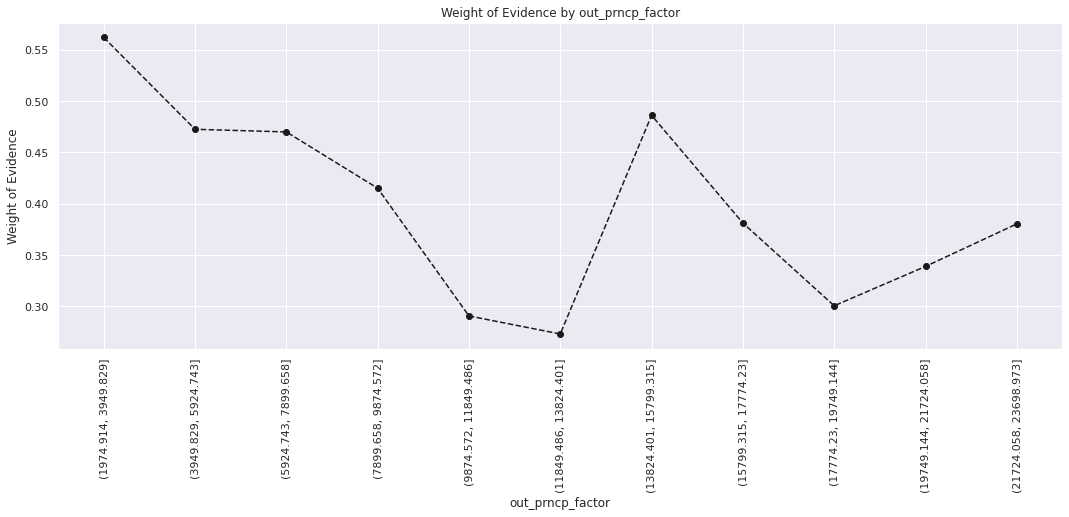

In [53]:

# We will zoom into the middle area to see more
plot_by_woe(df_temp.iloc[1:12,:],90)

#### total_pymnt

In [54]:
# Initial examination shows that there are vey few obs with >25,000 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_pymnt'] <= 25000].copy()
# fine-classing
X_train_prepr_temp['total_pymnt_factor'] = pd.cut(X_train_prepr_temp['total_pymnt'], 20)
# preprocess 'total_acc'
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_pymnt_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,total_pymnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-24.998, 1249.879]",117106,0.981880,0.350897,114984.0,2122.0,0.351142,0.338113,0.037810,NaN,NaN,inf
1,"(1249.879, 2499.758]",82038,0.976974,0.245819,80149.0,1889.0,0.244762,0.300988,-0.206784,0.004906,0.244594,inf
2,"(2499.758, 3749.637]",51843,0.979014,0.155343,50755.0,1088.0,0.154997,0.173359,-0.111955,0.002039,0.094829,inf
3,"(3749.637, 4999.516]",30202,0.980034,0.090497,29599.0,603.0,0.090390,0.096080,-0.061045,0.001021,0.050910,inf
4,"(4999.516, 6249.395]",18676,0.986025,0.055961,18415.0,261.0,0.056236,0.041587,0.301777,0.005990,0.362822,inf
5,"(6249.395, 7499.274]",10531,0.986136,0.031555,10385.0,146.0,0.031714,0.023263,0.309887,0.000111,0.008111,inf
6,"(7499.274, 8749.153]",6734,0.987229,0.020178,6648.0,86.0,0.020302,0.013703,0.393100,0.001093,0.083213,inf
7,"(8749.153, 9999.032]",3844,0.990375,0.011518,3807.0,37.0,0.011626,0.005895,0.679055,0.003146,0.285955,inf
8,"(9999.032, 11248.911]",3301,0.992729,0.009891,3277.0,24.0,0.010007,0.003824,0.962006,0.002355,0.282951,inf
9,"(11248.911, 12498.79]",1859,0.996235,0.005570,1852.0,7.0,0.005656,0.001115,1.623487,0.003505,0.661481,inf


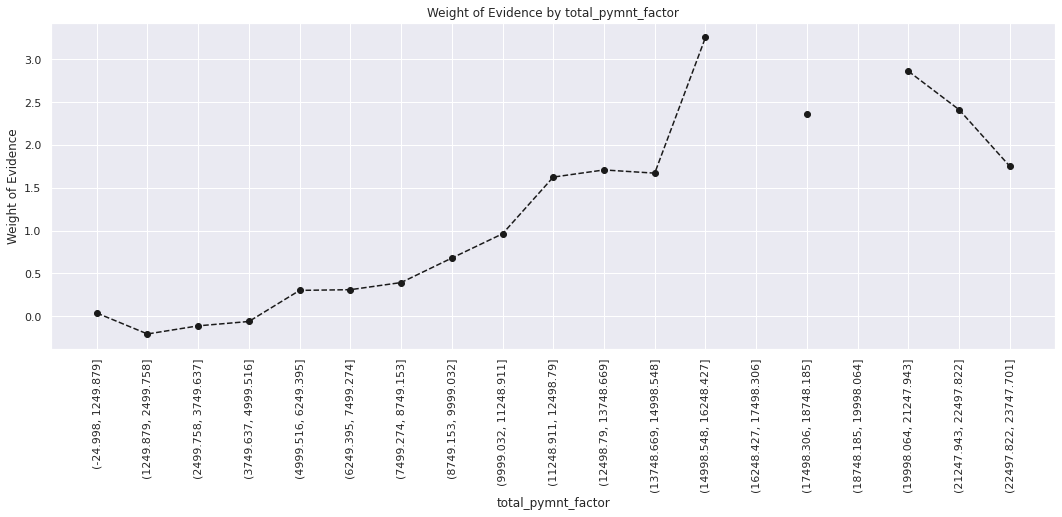

In [55]:
plot_by_woe(df_temp,90)

#### total_rec_int

In [56]:
# Initial examination shows that there are vey few obs with >7,261 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_rec_int'] <= 7261].copy()
# fine-classing
X_train_prepr_temp['total_rec_int_factor'] = pd.cut(X_train_prepr_temp['total_rec_int'], 20)
# preprocess 'total_rec_int'
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_rec_int_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp


,total_rec_int_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-7.257, 362.854]",126159,0.986026,0.374591,124396.0,1763.0,0.376376,0.280688,0.293345,NaN,NaN,0.055529
1,"(362.854, 725.707]",76866,0.981695,0.228231,75459.0,1407.0,0.228311,0.224009,0.019022,0.004330,0.274323,0.055529
2,"(725.707, 1088.56]",45860,0.978107,0.136168,44856.0,1004.0,0.135718,0.159847,-0.163642,0.003588,0.182664,0.055529
3,"(1088.56, 1451.414]",29096,0.976354,0.086392,28408.0,688.0,0.085952,0.109537,-0.242470,0.001753,0.078828,0.055529
4,"(1451.414, 1814.268]",19316,0.977998,0.057353,18891.0,425.0,0.057157,0.067664,-0.168756,0.001643,0.073714,0.055529
5,"(1814.268, 2177.121]",12702,0.972052,0.037715,12347.0,355.0,0.037357,0.056520,-0.414057,0.005946,0.245301,0.055529
6,"(2177.121, 2539.974]",8319,0.972713,0.024701,8092.0,227.0,0.024483,0.036141,-0.389427,0.000661,0.024631,0.055529
7,"(2539.974, 2902.828]",5608,0.977532,0.016651,5482.0,126.0,0.016586,0.020060,-0.190164,0.004819,0.199262,0.055529
8,"(2902.828, 3265.682]",3926,0.978859,0.011657,3843.0,83.0,0.011627,0.013214,-0.127940,0.001327,0.062225,0.055529
9,"(3265.682, 3628.535]",2786,0.976669,0.008272,2721.0,65.0,0.008233,0.010349,-0.228740,0.002190,0.100801,0.055529


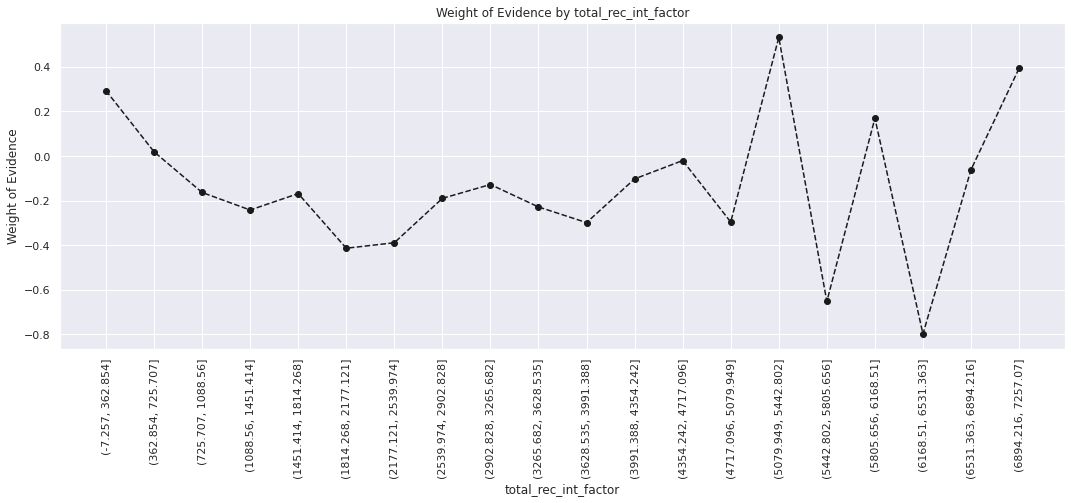

In [57]:
plot_by_woe(df_temp, 90)

#### last_pymnt_amnt

In [58]:
# Initial examination shows that there are vey few obs with 10,000 which should be very rare, so we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['last_pymnt_amnt'] <= 10000].copy()
# fine-classing
X_train_prepr_temp['last_pymnt_amnt_factor'] = pd.cut(X_train_prepr_temp['last_pymnt_amnt'], 15)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'last_pymnt_amnt_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,last_pymnt_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-10.0, 666.667]",265031,0.980998,0.811110,259995.0,5036.0,0.811267,0.803062,0.010166,NaN,NaN,inf
1,"(666.667, 1333.333]",53782,0.977929,0.164596,52595.0,1187.0,0.164113,0.189284,-0.142692,0.003069,0.152858,inf
2,"(1333.333, 2000.0]",663,0.944193,0.002029,626.0,37.0,0.001953,0.005900,-1.105452,0.033736,0.962759,inf
3,"(2000.0, 2666.667]",510,0.990196,0.001561,505.0,5.0,0.001576,0.000797,0.681236,0.046003,1.786688,inf
4,"(2666.667, 3333.333]",473,0.995772,0.001448,471.0,2.0,0.001470,0.000319,1.527827,0.005576,0.846590,inf
5,"(3333.333, 4000.0]",522,0.998084,0.001598,521.0,1.0,0.001626,0.000159,2.321866,0.002313,0.794039,inf
6,"(4000.0, 4666.667]",581,1.000000,0.001778,581.0,0.0,0.001813,0.000000,inf,0.001916,inf,inf
7,"(4666.667, 5333.333]",768,0.998698,0.002350,767.0,1.0,0.002393,0.000159,2.708603,0.001302,inf,inf
8,"(5333.333, 6000.0]",673,0.998514,0.002060,672.0,1.0,0.002097,0.000159,2.576374,0.000184,0.132228,inf
9,"(6000.0, 6666.667]",668,1.000000,0.002044,668.0,0.0,0.002084,0.000000,inf,0.001486,inf,inf


#### tot_cur_bal

In [59]:
# Again, because of very few obs > 64,000, we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['tot_cur_bal'] <= 80000].copy()
# fine-classing
X_train_prepr_temp['tot_cur_bal_factor'] = pd.cut(X_train_prepr_temp['tot_cur_bal'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'tot_cur_bal_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,tot_cur_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-80.0, 3200.0]",2492,0.978331,0.014763,2438.0,54.0,0.014760,0.014934,-0.011712,NaN,NaN,0.009755
1,"(3200.0, 6400.0]",6262,0.982114,0.037098,6150.0,112.0,0.037232,0.030973,0.184047,0.003784,0.195759,0.009755
2,"(6400.0, 9600.0]",7902,0.982663,0.046814,7765.0,137.0,0.047010,0.037887,0.215740,0.000548,0.031692,0.009755
3,"(9600.0, 12800.0]",9294,0.981063,0.055061,9118.0,176.0,0.055201,0.048673,0.125860,0.001600,0.089879,0.009755
4,"(12800.0, 16000.0]",9749,0.977331,0.057756,9528.0,221.0,0.057683,0.061117,-0.057834,0.003732,0.183694,0.009755
5,"(16000.0, 19200.0]",10357,0.978469,0.061358,10134.0,223.0,0.061352,0.061670,-0.005182,0.001138,0.052652,0.009755
6,"(19200.0, 22400.0]",10338,0.979300,0.061246,10124.0,214.0,0.061291,0.059181,0.035027,0.000831,0.040208,0.009755
7,"(22400.0, 25600.0]",10507,0.978205,0.062247,10278.0,229.0,0.062223,0.063330,-0.017622,0.001095,0.052649,0.009755
8,"(25600.0, 28800.0]",10195,0.978028,0.060399,9971.0,224.0,0.060365,0.061947,-0.025871,0.000177,0.008249,0.009755
9,"(28800.0, 32000.0]",9975,0.979248,0.059095,9768.0,207.0,0.059136,0.057246,0.032487,0.001220,0.058358,0.009755


#### total_rev_hi_lim

In [60]:
# initial examination reveals very few obs > 79,780, we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_rev_hi_lim'] <= 79780].copy()
# fine-classing
X_train_prepr_temp['total_rev_hi_lim_factor'] = pd.cut(X_train_prepr_temp['total_rev_hi_lim'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_rev_hi_lim_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-79.755, 3190.2]",3834,0.970788,0.012161,3722.0,112.0,0.012037,0.018497,-0.429628,NaN,NaN,0.03953
1,"(3190.2, 6380.4]",14262,0.974337,0.045238,13896.0,366.0,0.044940,0.060446,-0.296423,0.003550,0.133205,0.03953
2,"(6380.4, 9570.6]",23512,0.975204,0.074578,22929.0,583.0,0.074153,0.096284,-0.261175,0.000867,0.035248,0.03953
3,"(9570.6, 12760.8]",27989,0.976955,0.088778,27344.0,645.0,0.088431,0.106524,-0.186144,0.001751,0.075032,0.03953
4,"(12760.8, 15951.0]",29375,0.978689,0.093175,28749.0,626.0,0.092975,0.103386,-0.106138,0.001734,0.080006,0.03953
5,"(15951.0, 19141.2]",28121,0.978664,0.089197,27521.0,600.0,0.089003,0.099092,-0.107371,0.000026,0.001233,0.03953
6,"(19141.2, 22331.4]",25538,0.981087,0.081004,25055.0,483.0,0.081028,0.079769,0.015666,0.002423,0.123037,0.03953
7,"(22331.4, 25521.6]",22592,0.982383,0.071660,22194.0,398.0,0.071776,0.065731,0.087979,0.001296,0.072313,0.03953
8,"(25521.6, 28711.8]",19978,0.982681,0.063368,19632.0,346.0,0.063490,0.057143,0.105331,0.000298,0.017352,0.03953
9,"(28711.8, 31902.0]",17404,0.982418,0.055204,17098.0,306.0,0.055295,0.050537,0.089986,0.000263,0.015346,0.03953


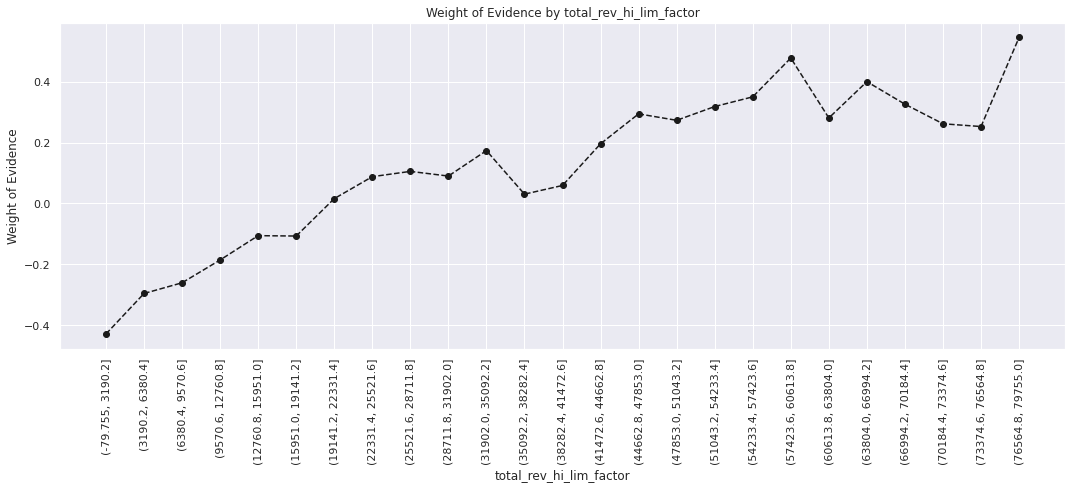

In [61]:

plot_by_woe(df_temp, 90)

#### mths_since_earliest_cr_line_factor

In [62]:
# fine-classing
X_train_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(X_train_prepr['mths_since_earliest_cr_line'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr, 'mths_since_earliest_cr_line_factor', y_train_prepr)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(92.474, 114.04]",5514,0.977512,0.016368,5390.0,124.0,0.016304,0.019742,-0.191343,NaN,NaN,0.03635
1,"(114.04, 135.08]",8005,0.975016,0.023763,7805.0,200.0,0.023609,0.031842,-0.299159,0.002496,0.107817,0.03635
2,"(135.08, 156.12]",13109,0.974445,0.038914,12774.0,335.0,0.038640,0.053335,-0.322325,0.000571,0.023166,0.03635
3,"(156.12, 177.16]",21410,0.975199,0.063555,20879.0,531.0,0.063156,0.084541,-0.291625,0.000753,0.030701,0.03635
4,"(177.16, 198.2]",34212,0.977990,0.101557,33459.0,753.0,0.101209,0.119885,-0.169351,0.002792,0.122274,0.03635
5,"(198.2, 219.24]",39692,0.979920,0.117824,38895.0,797.0,0.117652,0.126891,-0.075596,0.001930,0.093755,0.03635
6,"(219.24, 240.28]",40345,0.981361,0.119763,39593.0,752.0,0.119763,0.119726,0.000309,0.001440,0.075905,0.03635
7,"(240.28, 261.32]",33641,0.981481,0.099862,33018.0,623.0,0.099875,0.099188,0.006900,0.000120,0.006590,0.03635
8,"(261.32, 282.36]",26639,0.983220,0.079077,26192.0,447.0,0.079227,0.071167,0.107289,0.001739,0.100389,0.03635
9,"(282.36, 303.4]",24283,0.983898,0.072083,23892.0,391.0,0.072270,0.062251,0.149230,0.000678,0.041941,0.03635


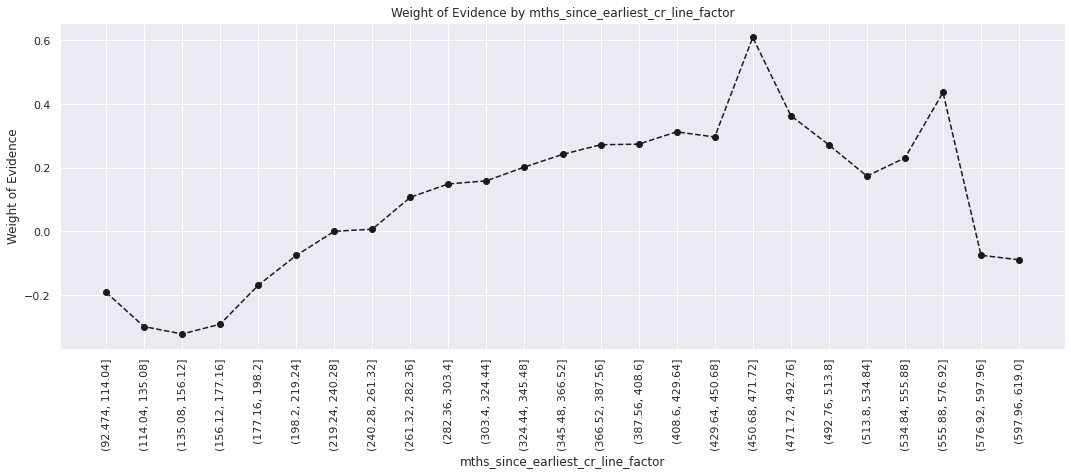

In [63]:
plot_by_woe(df_temp, 90)

#### mths_since_issue_d_factor

In [64]:
# fine-classing
X_train_prepr['mths_since_issue_d_factor'] = pd.cut(X_train_prepr['mths_since_issue_d'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr, "mths_since_issue_d_factor", y_train_prepr)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(55.989, 56.44]",35424,1.000000,0.105155,35424.0,0.0,0.107153,0.000000,inf,NaN,NaN,inf
1,"(56.44, 56.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(56.88, 57.32]",29929,0.998029,0.088843,29870.0,59.0,0.090353,0.009393,2.263711,NaN,NaN,inf
3,"(57.32, 57.76]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(57.76, 58.2]",38907,0.997558,0.115494,38812.0,95.0,0.117401,0.015125,2.049246,NaN,NaN,inf
5,"(58.2, 58.64]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(58.64, 59.08]",22879,0.993925,0.067915,22740.0,139.0,0.068785,0.022130,1.134045,NaN,NaN,inf
7,"(59.08, 59.52]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(59.52, 59.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(59.96, 60.4]",28788,0.990621,0.085456,28518.0,270.0,0.086263,0.042987,0.696507,NaN,NaN,inf


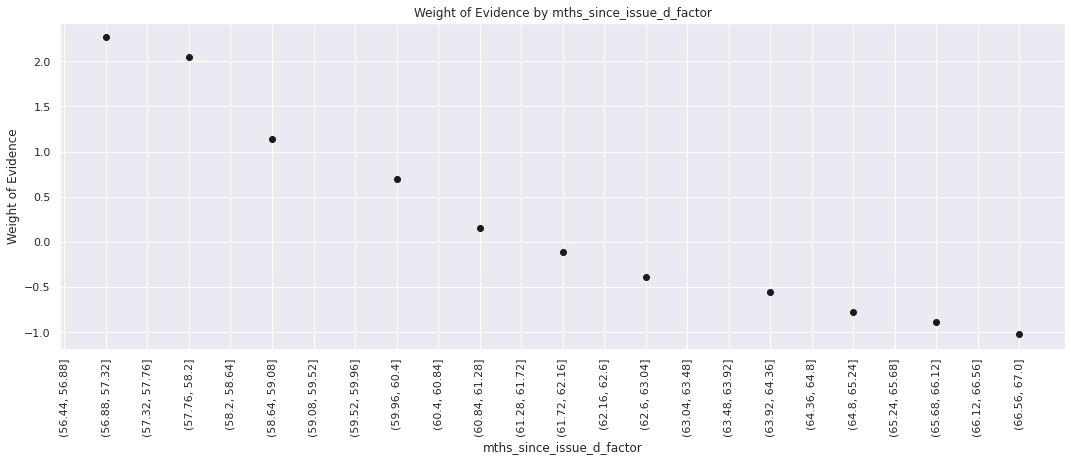

In [65]:

plot_by_woe(df_temp, 90)

#### mths_since_last_pymnt_d_factor

In [66]:
# fine-classing
X_train_prepr['mths_since_last_pymnt_d_factor'] = pd.cut(X_train_prepr['mths_since_last_pymnt_d'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr, "mths_since_last_pymnt_d_factor", y_train_prepr)
df_temp

,mths_since_last_pymnt_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(54.988, 55.48]",232472,0.998675,0.719754,232164.0,308.0,0.732513,0.050943,2.665778,NaN,NaN,inf
1,"(55.48, 55.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(55.96, 56.44]",70914,0.994106,0.219556,70496.0,418.0,0.222426,0.069137,1.168508,NaN,NaN,inf
3,"(56.44, 56.92]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(56.92, 57.4]",3749,0.695385,0.011607,2607.0,1142.0,0.008225,0.188885,-3.133903,NaN,NaN,inf
5,"(57.4, 57.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(57.88, 58.36]",3792,0.683017,0.011740,2590.0,1202.0,0.008172,0.198809,-3.191651,NaN,NaN,inf
7,"(58.36, 58.84]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(58.84, 59.32]",2868,0.697699,0.008880,2001.0,867.0,0.006313,0.143401,-3.122959,NaN,NaN,inf
9,"(59.32, 59.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


#### mths_since_last_credit_pull_d

In [67]:
# filter out all values > 75 given the low obs
X_train_prepr_temp = X_train_prepr[X_train_prepr['mths_since_last_credit_pull_d'] <= 75].copy()
# Here we do fine-classing: using the 'cut' method, we split the variable into 25 categories
X_train_prepr_temp['mths_since_last_credit_pull_d_factor'] = pd.cut(X_train_prepr_temp['mths_since_last_credit_pull_d'], 25)
# Calculate WoE
df_temp = woe_ordered_continuous(X_train_prepr_temp, "mths_since_last_credit_pull_d_factor", y_train_prepr[X_train_prepr_temp.index])
df_temp

,mths_since_last_credit_pull_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(54.987, 55.52]",322212,0.983291,0.956502,316828.0,5384.0,0.958386,0.857325,0.111434,NaN,NaN,inf
1,"(55.52, 56.04]",4252,0.882408,0.012622,3752.0,500.0,0.011350,0.079618,-1.948058,0.100882,2.059491,inf
2,"(56.04, 56.56]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(56.56, 57.08]",2561,0.986724,0.007602,2527.0,34.0,0.007644,0.005414,0.344934,NaN,NaN,inf
4,"(57.08, 57.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(57.6, 58.12]",1944,0.984568,0.005771,1914.0,30.0,0.005790,0.004777,0.192259,NaN,NaN,inf
6,"(58.12, 58.64]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(58.64, 59.16]",1632,0.918505,0.004845,1499.0,133.0,0.004534,0.021178,-1.541289,NaN,NaN,inf
8,"(59.16, 59.68]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(59.68, 60.2]",1122,0.930481,0.003331,1044.0,78.0,0.003158,0.012420,-1.369388,NaN,NaN,inf


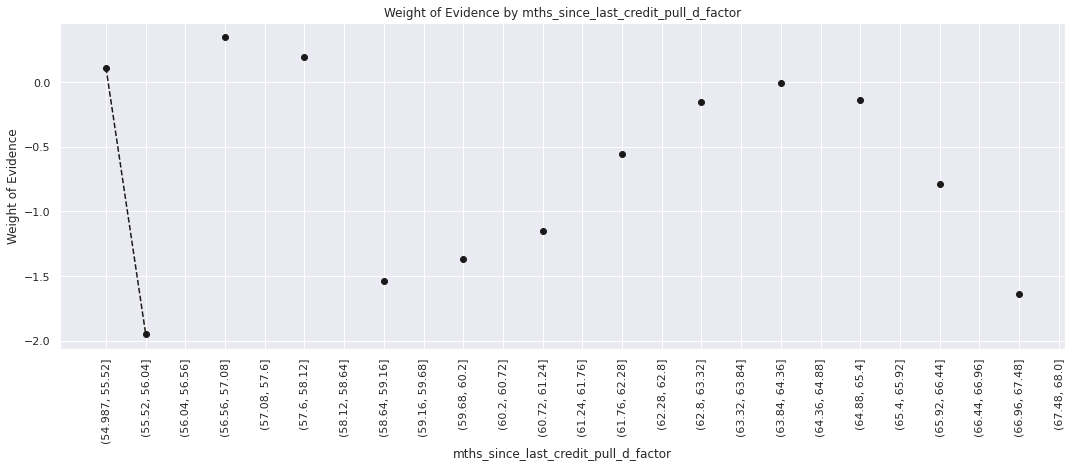

In [68]:

plot_by_woe(df_temp, 90)

## Define Custom Class for WoE Binning/Reengineering
Here we will create a custom scikit-learn class to take care of all binning transformations on any given data set. This custom class will help us in performing k fold cross validation

In [69]:
# create a list of all the reference categories, i.e. one category from each of the global features
ref_categories = ['mths_since_last_credit_pull_d:>75', 'mths_since_issue_d:>122', 'mths_since_earliest_cr_line:>434', 'total_rev_hi_lim:>79,780', 
                  'total_rec_int:>7,260', 'total_pymnt:>25,000', 'out_prncp:>15,437', 'revol_util:>1.0', 'inq_last_6mths:>4', 'dti:>35.191', 
                  'annual_inc:>150K', 'int_rate:>20.281', 'term:60', 'purpose:major_purch__car__home_impr', 'verification_status:Not Verified', 
                  'home_ownership:MORTGAGE', 'grade:G']

In [70]:
# This custom class will create new categorical dummy features based on the cut-off points that we manually identified
# based on the WoE plots and IV above.
# Given the way it is structured, this class also allows a fit_transform method to be implemented on it, thereby allowing 
# us to use it as part of a scikit-learn Pipeline 
class WoE_Binning(BaseEstimator, TransformerMixin):
    def __init__(self, X): # no *args or *kargs
        self.X = X
    def fit(self, X, y = None):
        return self #nothing else to do
    def transform(self, X):
        X_new = X.loc[:, 'grade:A': 'grade:G']
        X_new['home_ownership:OWN'] = X.loc[:,'home_ownership:OWN']
        X_new['home_ownership:MORTGAGE'] = X.loc[:,'home_ownership:MORTGAGE']
        X_new['home_ownership:OTHER_NONE_RENT'] = sum([X['home_ownership:ANY'], X['home_ownership:RENT']])
        X_new = pd.concat([X_new, X.loc[:, 'verification_status:Not Verified':'verification_status:Verified']], axis = 1)
        # For the purpose of this column, we keep debt_consolidation (due to volume) and credit_card (due to unique characteristics) as separate cateogories
        # These categories have very few observations: educational, renewable_energy, vacation, house, wedding, car
        # car is the least risky so we will combine it with the other 2 least risky categories: home_improvement and major_purchase
        # educational, renewable_energy (both low observations) will be combined with small_business and moving
        # vacation, house and wedding (remaining 3 with low observations) will be combined with medical and other
        X_new['purpose:debt_consolidation'] = X.loc[:,'purpose:debt_consolidation']
        X_new['purpose:credit_card'] = X.loc[:,'purpose:credit_card']
        X_new['purpose:major_purch__car__home_impr'] = sum([X['purpose:major_purchase'], X['purpose:car'], X['purpose:home_improvement']])
        X_new['purpose:educ__ren_en__sm_b__mov'] = sum([X['purpose:educational'], X['purpose:renewable_energy'], X['purpose:small_business'], 
                                                        X['purpose:moving']])
        X_new['purpose:vacation__house__wedding__med__oth'] = sum([X['purpose:vacation'], X['purpose:house'], X['purpose:wedding'], 
                                                                   X['purpose:medical'], X['purpose:other']])
        X_new['term:36'] = np.where((X['term'] == 36), 1, 0)
        X_new['term:60'] = np.where((X['term'] == 60), 1, 0)
        X_new['int_rate:<7.071'] = np.where((X['int_rate'] <= 7.214), 1, 0)
        X_new['int_rate:7.071-10.374'] = np.where((X['int_rate'] > 7.214) & (X['int_rate'] <= 11.001), 1, 0)
        X_new['int_rate:10.374-13.676'] = np.where((X['int_rate'] > 11.001) & (X['int_rate'] <= 14.788), 1, 0)
        X_new['int_rate:13.676-15.74'] = np.where((X['int_rate'] > 14.788) & (X['int_rate'] <= 17.155), 1, 0)
        X_new['int_rate:15.74-20.281'] = np.where((X['int_rate'] > 17.155) & (X['int_rate'] <= 22.362), 1, 0)
        X_new['int_rate:>20.281'] = np.where((X['int_rate'] > 22.362), 1, 0)
        X_new['annual_inc:missing'] = np.where(X['annual_inc'].isnull(), 1, 0)
        X_new['annual_inc:<28,555'] = np.where((X['annual_inc'] <= 27000), 1, 0)
        X_new['annual_inc:28,555-37,440'] = np.where((X['annual_inc'] > 27000) & (X['annual_inc'] <= 36000), 1, 0)
        X_new['annual_inc:37,440-61,137'] = np.where((X['annual_inc'] > 36000) & (X['annual_inc'] <= 60000), 1, 0)
        X_new['annual_inc:61,137-81,872'] = np.where((X['annual_inc'] > 60000) & (X['annual_inc'] <= 81000), 1, 0)
        X_new['annual_inc:81,872-102,606'] = np.where((X['annual_inc'] > 81000) & (X['annual_inc'] <= 102000), 1, 0)
        X_new['annual_inc:102,606-120,379'] = np.where((X['annual_inc'] > 102000) & (X['annual_inc'] <= 120000), 1, 0)
        X_new['annual_inc:120,379-150,000'] = np.where((X['annual_inc'] > 120000) & (X['annual_inc'] <= 150000), 1, 0)
        X_new['annual_inc:>150K'] = np.where((X['annual_inc'] > 150000), 1, 0)
        X_new['dti:<=1.6'] = np.where((X['dti'] <= 1.7), 1, 0)
        X_new['dti:1.6-5.599'] = np.where((X['dti'] > 1.6) & (X['dti'] <= 5.872), 1, 0)
        X_new['dti:5.599-10.397'] = np.where((X['dti'] > 5.872) & (X['dti'] <= 10.904), 1, 0)
        X_new['dti:10.397-15.196'] = np.where((X['dti'] > 10.904) & (X['dti'] <= 15.098), 1, 0)
        X_new['dti:15.196-19.195'] = np.where((X['dti'] > 15.098) & (X['dti'] <= 19.292), 1, 0)
        X_new['dti:19.195-24.794'] = np.where((X['dti'] > 19.292) & (X['dti'] <= 24.325), 1, 0)
        X_new['dti:24.794-35.191'] = np.where((X['dti'] > 24.325) & (X['dti'] <= 35.230), 1, 0)
        X_new['dti:>35.191'] = np.where((X['dti'] > 35.230), 1, 0)
        X_new['inq_last_6mths:missing'] = np.where(X['inq_last_6mths'].isnull(), 1, 0)
        X_new['inq_last_6mths:0'] = np.where((X['inq_last_6mths'] == 0), 1, 0)
        X_new['inq_last_6mths:1-2'] = np.where((X['inq_last_6mths'] >= 1) & (X['inq_last_6mths'] <= 2), 1, 0)
        X_new['inq_last_6mths:3-4'] = np.where((X['inq_last_6mths'] >= 3) & (X['inq_last_6mths'] <= 4), 1, 0)
        X_new['inq_last_6mths:>4'] = np.where((X['inq_last_6mths'] > 4), 1, 0)
        # We will discretize on the deciles for revol_util
        X_new['revol_util:missing'] = np.where(X['revol_util'].isnull(), 1, 0)
        X_new['revol_util:<0.1'] = np.where((X['revol_util'] <= 0.1), 1, 0)
        X_new['revol_util:0.1-0.2'] = np.where((X['revol_util'] > 0.1) & (X['revol_util'] <= 0.2), 1, 0)
        X_new['revol_util:0.2-0.3'] = np.where((X['revol_util'] > 0.2) & (X['revol_util'] <= 0.3), 1, 0)
        X_new['revol_util:0.3-0.4'] = np.where((X['revol_util'] > 0.3) & (X['revol_util'] <= 0.4), 1, 0)
        X_new['revol_util:0.4-0.5'] = np.where((X['revol_util'] > 0.4) & (X['revol_util'] <= 0.5), 1, 0)
        X_new['revol_util:0.5-0.6'] = np.where((X['revol_util'] > 0.5) & (X['revol_util'] <= 0.6), 1, 0)
        X_new['revol_util:0.6-0.7'] = np.where((X['revol_util'] > 0.6) & (X['revol_util'] <= 0.7), 1, 0)
        X_new['revol_util:0.7-0.8'] = np.where((X['revol_util'] > 0.7) & (X['revol_util'] <= 0.8), 1, 0)
        X_new['revol_util:0.8-0.9'] = np.where((X['revol_util'] > 0.8) & (X['revol_util'] <= 0.9), 1, 0)
        X_new['revol_util:0.9-1.0'] = np.where((X['revol_util'] > 0.9) & (X['revol_util'] <= 1.0), 1, 0)
        X_new['revol_util:>1.0'] = np.where((X['revol_util'] > 1.0), 1, 0)
        X_new['out_prncp:<1,286'] = np.where((X['out_prncp'] <= 1975), 1, 0)
        X_new['out_prncp:1,286-6,432'] = np.where((X['out_prncp'] > 1975) & (X['out_prncp'] <= 6000), 1, 0)
        X_new['out_prncp:6,432-9,005'] = np.where((X['out_prncp'] > 6000) & (X['out_prncp'] <= 9875), 1, 0)
        X_new['out_prncp:9,005-10,291'] = np.where((X['out_prncp'] > 9875) & (X['out_prncp'] <= 15800), 1, 0)
        X_new['out_prncp:10,291-15,437'] = np.where((X['out_prncp'] > 15800) & (X['out_prncp'] <= 25675), 1, 0)
        X_new['out_prncp:>15,437'] = np.where((X['out_prncp'] > 27675), 1, 0)
        X_new['total_pymnt:<10,000'] = np.where((X['total_pymnt'] <= 1250), 1, 0)
        X_new['total_pymnt:10,000-15,000'] = np.where((X['total_pymnt'] > 1250) & (X['total_pymnt'] <= 2500), 1, 0)
        X_new['total_pymnt:15,000-20,000'] = np.where((X['total_pymnt'] > 2500) & (X['total_pymnt'] <= 5000), 1, 0)
        X_new['total_pymnt:>25,000'] = np.where((X['total_pymnt'] > 5000), 1, 0)
        X_new['total_rec_int:<1,089'] = np.where((X['total_rec_int'] <= 1089), 1, 0)
        X_new['total_rec_int:1,089-2,541'] = np.where((X['total_rec_int'] > 1089) & (X['total_rec_int'] <= 2541), 1, 0)
        X_new['total_rec_int:2,541-4,719'] = np.where((X['total_rec_int'] > 2541) & (X['total_rec_int'] <= 4719), 1, 0)
        X_new['total_rec_int:4,719-7,260'] = np.where((X['total_rec_int'] > 4719) & (X['total_rec_int'] <= 7260), 1, 0)
        X_new['total_rec_int:>7,260'] = np.where((X['total_rec_int'] > 7260), 1, 0)
        X_new['total_rev_hi_lim:missing'] = np.where(X['total_rev_hi_lim'].isnull(), 1, 0)
        X_new['total_rev_hi_lim:<6,381'] = np.where((X['total_rev_hi_lim'] <= 6381), 1, 0)
        X_new['total_rev_hi_lim:6,381-19,144'] = np.where((X['total_rev_hi_lim'] > 6381) & (X['total_rev_hi_lim'] <= 19144), 1, 0)
        X_new['total_rev_hi_lim:19,144-25,525'] = np.where((X['total_rev_hi_lim'] > 19144) & (X['total_rev_hi_lim'] <= 25525), 1, 0)
        X_new['total_rev_hi_lim:25,525-35,097'] = np.where((X['total_rev_hi_lim'] > 25525) & (X['total_rev_hi_lim'] <= 35097), 1, 0)
        X_new['total_rev_hi_lim:35,097-54,241'] = np.where((X['total_rev_hi_lim'] > 35097) & (X['total_rev_hi_lim'] <= 54241), 1, 0)
        X_new['total_rev_hi_lim:54,241-79,780'] = np.where((X['total_rev_hi_lim'] > 54241) & (X['total_rev_hi_lim'] <= 79780), 1, 0)
        X_new['total_rev_hi_lim:>79,780'] = np.where((X['total_rev_hi_lim'] > 79780), 1, 0)
        X_new['mths_since_earliest_cr_line:missing'] = np.where(X['mths_since_earliest_cr_line'].isnull(), 1, 0)
        X_new['mths_since_earliest_cr_line:<125'] = np.where((X['mths_since_earliest_cr_line'] <= 115), 1, 0)
        X_new['mths_since_earliest_cr_line:125-167'] = np.where((X['mths_since_earliest_cr_line'] > 115) & (X['mths_since_earliest_cr_line'] <= 157), 1, 0)
        X_new['mths_since_earliest_cr_line:167-249'] = np.where((X['mths_since_earliest_cr_line'] > 157) & (X['mths_since_earliest_cr_line'] <= 260), 1, 0)
        X_new['mths_since_earliest_cr_line:249-331'] = np.where((X['mths_since_earliest_cr_line'] > 260) & (X['mths_since_earliest_cr_line'] <= 325), 1, 0)
        X_new['mths_since_earliest_cr_line:331-434'] = np.where((X['mths_since_earliest_cr_line'] > 325) & (X['mths_since_earliest_cr_line'] <= 434), 1, 0)
        X_new['mths_since_earliest_cr_line:>434'] = np.where((X['mths_since_earliest_cr_line'] > 434), 1, 0)
        X_new['mths_since_issue_d:<79'] = np.where((X['mths_since_issue_d'] <= 59), 1, 0)
        X_new['mths_since_issue_d:79-89'] = np.where((X['mths_since_issue_d'] > 59) & (X['mths_since_issue_d'] <= 62), 1, 0)
        X_new['mths_since_issue_d:89-100'] = np.where((X['mths_since_issue_d'] > 62) & (X['mths_since_issue_d'] <= 65), 1, 0)
        X_new['mths_since_issue_d:100-122'] = np.where((X['mths_since_issue_d'] > 65) & (X['mths_since_issue_d'] <= 67), 1, 0)
        X_new['mths_since_issue_d:>122'] = np.where((X['mths_since_issue_d'] > 67), 1, 0)
        X_new['mths_since_last_credit_pull_d:missing'] = np.where(X['mths_since_last_credit_pull_d'].isnull(), 1, 0)
        X_new['mths_since_last_credit_pull_d:<56'] = np.where((X['mths_since_last_credit_pull_d'] <= 56), 1, 0)
        X_new['mths_since_last_credit_pull_d:56-61'] = np.where((X['mths_since_last_credit_pull_d'] > 56) & (X['mths_since_last_credit_pull_d'] <= 61), 1, 0)
        X_new['mths_since_last_credit_pull_d:>75'] = np.where((X['mths_since_last_credit_pull_d'] > 61), 1, 0)
        X_new.drop(columns = ref_categories, inplace = True)
        return X_new
# we could have also structured this class without the last drop statement and without creating categories out of the 
# feature categories. But doing the way we have done here allows us to keep a proper track of the categories, if required

## PD Model

In [71]:
# reconfirm shape of the 4 datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(336875, 61)
(336875,)
(84219, 61)
(84219,)


In [72]:
# define modeling pipeline
reg = LogisticRegression(max_iter=1000, class_weight = 'balanced')
woe_transform = WoE_Binning(X)
pipeline = Pipeline(steps=[('woe', woe_transform), ('model', reg)])

# define cross-validation criteria. RepeatedStratifiedKFold automatially takes care of the class imbalance while splitting
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# fit and evaluate the logistic regression pipeline with cross-validation as defined in cv
scores = cross_val_score(pipeline, X_train, y_train, scoring = 'roc_auc', cv = cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

Mean AUROC: 0.9085
Gini: 0.8171


In [73]:
# pretty impressive scores for the first time, now let's fit the pipeline on the whole training set
pipeline.fit(X_train, y_train)

Pipeline(steps=[('woe',
                 WoE_Binning(X=        loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           20000        20000            20000   36 months     12.29   
1           11000        11000            11000   36 months     12.69   
2            7000         7000             7000   36 months      9.99   
3           10000        10000            10000   36 months     10.99   
4            9550         9550             9550   36 months     19.99   
...           ...          ...              ...         ...       ...   
421089      25000        25000            25000   36 months     20.99   
421090       5875         5875             5875   36 months     15.59   
421091      10000        10000            10000   60 months     23.99   
421092      1960...
421092                          NaN            1       INDIVIDUAL   
421093                         69.0            1       INDIVIDUAL   

        acc_now_delinq  tot_coll_amt  tot_cur_bal  total

In [74]:
#first create a transformed training set through our WoE_Binning custom class
X_train_woe_transformed = woe_transform.fit_transform(X_train)
# Store the column names in X_train as a list
feature_name = X_train_woe_transformed.columns.values
# Create a summary table of our logistic regression model
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' model
summary_table['Coefficients'] = np.transpose(pipeline['model'].coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', pipeline['model'].intercept_[0]]
# Sort the dataframe by index
summary_table.sort_index(inplace = True)
summary_table

,Feature name,Coefficients
0,Intercept,4.344731
1,grade:A,3.608403
2,grade:B,2.722339
3,grade:C,2.232551
4,grade:D,1.775735
...,...,...
78,mths_since_issue_d:89-100,-1.538176
79,mths_since_issue_d:100-122,-2.839680
80,mths_since_last_credit_pull_d:missing,-5.072975
81,mths_since_last_credit_pull_d:<56,-1.017218


## Prediction

In [75]:
# make preditions on our test set
y_hat_test = pipeline.predict(X_test)
# get the predicted probabilities
y_hat_test_proba = pipeline.predict_proba(X_test)
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]

In [76]:
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# check the shape to make sure the number of rows is same as that in y_test
y_test_proba.shape

(84219, 2)

In [77]:

# Rename the columns
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = X_test.index
y_test_proba

,y_test_class_actual,y_hat_test_proba
85226,1,0.984740
135248,1,0.887361
124342,1,0.993216
318929,1,0.813538
49176,1,0.950870
...,...,...
287341,1,0.858182
401921,1,0.333186
63105,1,0.877282
358896,1,0.289687


## Confusion Matrix & AUROC on test set

In [78]:
# assign a threshold value to differentiate good with bad
tr = 0.5
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimat threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize = 'all')

array([[0.01516285, 0.00347902],
       [0.15469193, 0.82666619]])

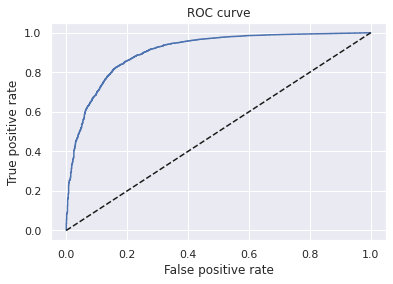

In [79]:

# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [80]:
# Calculate the Area Under the Receiver Operating Characteristic Curve (AUROC) on our test set
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC


0.9051390258843843

In [81]:
# calculate Gini from AUROC
Gini = AUROC * 2 - 1
Gini

0.8102780517687687

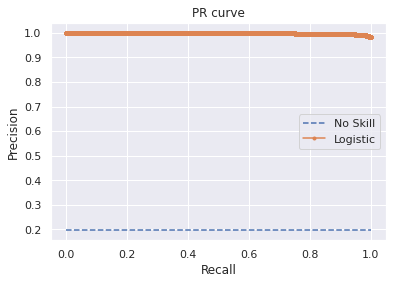

In [82]:

# draw a PR curve
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [83]:
# calculate PR AUC
auc_pr = auc(recall, precision)
auc_pr

0.9975790735217801

## Applying the Model - Scorecard Creation

In [84]:
summary_table


,Feature name,Coefficients
0,Intercept,4.344731
1,grade:A,3.608403
2,grade:B,2.722339
3,grade:C,2.232551
4,grade:D,1.775735
...,...,...
78,mths_since_issue_d:89-100,-1.538176
79,mths_since_issue_d:100-122,-2.839680
80,mths_since_last_credit_pull_d:missing,-5.072975
81,mths_since_last_credit_pull_d:<56,-1.017218


In [85]:
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list. We name it 'Feature name'.
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['Coefficients'] = 0
df_ref_categories

,Feature name,Coefficients
0,mths_since_last_credit_pull_d:>75,0
1,mths_since_issue_d:>122,0
2,mths_since_earliest_cr_line:>434,0
3,"total_rev_hi_lim:>79,780",0
4,"total_rec_int:>7,260",0
5,"total_pymnt:>25,000",0
6,"out_prncp:>15,437",0
7,revol_util:>1.0,0
8,inq_last_6mths:>4,0
9,dti:>35.191,0


In [86]:
# Concatenates two dataframes.
df_scorecard = pd.concat([summary_table, df_ref_categories])
# We reset the index of a dataframe.
df_scorecard.reset_index(inplace = True)
df_scorecard

,index,Feature name,Coefficients
0,0,Intercept,4.344731
1,1,grade:A,3.608403
2,2,grade:B,2.722339
3,3,grade:C,2.232551
4,4,grade:D,1.775735
...,...,...,...
95,12,term:60,0.000000
96,13,purpose:major_purch__car__home_impr,0.000000
97,14,verification_status:Not Verified,0.000000
98,15,home_ownership:MORTGAGE,0.000000


In [87]:
# create a new column, called 'Original feature name', which contains the value of the 'Feature name' column, up to the column symbol.
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,Original feature name
0,0,Intercept,4.344731,Intercept
1,1,grade:A,3.608403,grade
2,2,grade:B,2.722339,grade
3,3,grade:C,2.232551,grade
4,4,grade:D,1.775735,grade
...,...,...,...,...
95,12,term:60,0.000000,term
96,13,purpose:major_purch__car__home_impr,0.000000,purpose
97,14,verification_status:Not Verified,0.000000,verification_status
98,15,home_ownership:MORTGAGE,0.000000,home_ownership


In [88]:
# Define the min and max threshholds for our scorecard
min_score = 300
max_score = 850

In [89]:
# calculate the sum of the minimum coefficients of each category within the original feature name
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# calculate the sum of the maximum coefficients of each category within the original feature name
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# create a new columns that has the imputed calculated Score based on the multiplication of the coefficient by the ratio of the differences between
# maximum & minimum score and maximum & minimum sum of cefficients.
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# update the calculated score of the Intercept (i.e. the default score for each loan)
df_scorecard.loc[0, 'Score - Calculation'] = ((df_scorecard.loc[0,'Coefficients'] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# round the values of the 'Score - Calculation' column and store them in a new column
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,4.344731,Intercept,606.452475,606.0
1,1,grade:A,3.608403,grade,52.750596,53.0
2,2,grade:B,2.722339,grade,39.797391,40.0
3,3,grade:C,2.232551,grade,32.637263,33.0
4,4,grade:D,1.775735,grade,25.959156,26.0
...,...,...,...,...,...,...
95,12,term:60,0.000000,term,0.000000,0.0
96,13,purpose:major_purch__car__home_impr,0.000000,purpose,0.000000,0.0
97,14,verification_status:Not Verified,0.000000,verification_status,0.000000,0.0
98,15,home_ownership:MORTGAGE,0.000000,home_ownership,0.000000,0.0


In [90]:
# check the min and max possible scores of our scorecard
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
print(min_sum_score_prel)
print(max_sum_score_prel)

300.0
850.0


In [91]:

# so both our min and max scores are out by +1. we need to manually adjust this
# Which one? We'll evaluate based on the rounding differences of the minimum category within each Original Feature Name.
pd.options.display.max_rows = 102
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,4.344731,Intercept,606.452475,606.0,-0.452475
1,1,grade:A,3.608403,grade,52.750596,53.0,0.249404
2,2,grade:B,2.722339,grade,39.797391,40.0,0.202609
3,3,grade:C,2.232551,grade,32.637263,33.0,0.362737
4,4,grade:D,1.775735,grade,25.959156,26.0,0.040844
5,5,grade:E,1.367489,grade,19.991083,20.0,0.008917
6,6,grade:F,0.715004,grade,10.452522,10.0,-0.452522
7,7,home_ownership:OWN,-0.209952,home_ownership,-3.069252,-3.0,0.069252
8,8,home_ownership:OTHER_NONE_RENT,-0.223942,home_ownership,-3.273767,-3.0,0.273767
9,9,verification_status:Source Verified,-0.423025,verification_status,-6.184125,-6.0,0.184125


In [92]:

# look like we can get by deducting 1 from the Intercept
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard.loc[0, 'Score - Final'] = 653
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,4.344731,Intercept,606.452475,606.0,-0.452475,653.0
1,1,grade:A,3.608403,grade,52.750596,53.0,0.249404,53.0
2,2,grade:B,2.722339,grade,39.797391,40.0,0.202609,40.0
3,3,grade:C,2.232551,grade,32.637263,33.0,0.362737,33.0
4,4,grade:D,1.775735,grade,25.959156,26.0,0.040844,26.0
5,5,grade:E,1.367489,grade,19.991083,20.0,0.008917,20.0
6,6,grade:F,0.715004,grade,10.452522,10.0,-0.452522,10.0
7,7,home_ownership:OWN,-0.209952,home_ownership,-3.069252,-3.0,0.069252,-3.0
8,8,home_ownership:OTHER_NONE_RENT,-0.223942,home_ownership,-3.273767,-3.0,0.273767,-3.0
9,9,verification_status:Source Verified,-0.423025,verification_status,-6.184125,-6.0,0.184125,-6.0


In [93]:

# Recheck min and max possible scores
print(df_scorecard.groupby('Original feature name')['Score - Final'].min().sum())
print(df_scorecard.groupby('Original feature name')['Score - Final'].max().sum())

347.0
897.0


## Calculating credit scores for all observations in the test data set

In [94]:
# first create a transformed test set through our WoE_Binning custom class
X_test_woe_transformed = woe_transform.fit_transform(X_test)
# insert an Intercept column in its beginning to align with the # of rows in scorecard
X_test_woe_transformed.insert(0, 'Intercept', 1)
X_test_woe_transformed.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:OTHER_NONE_RENT,verification_status:Source Verified,verification_status:Verified,purpose:debt_consolidation,purpose:credit_card,purpose:educ__ren_en__sm_b__mov,purpose:vacation__house__wedding__med__oth,term:36,int_rate:<7.071,int_rate:7.071-10.374,int_rate:10.374-13.676,int_rate:13.676-15.74,int_rate:15.74-20.281,annual_inc:missing,"annual_inc:<28,555","annual_inc:28,555-37,440","annual_inc:37,440-61,137","annual_inc:61,137-81,872","annual_inc:81,872-102,606","annual_inc:102,606-120,379","annual_inc:120,379-150,000",dti:<=1.6,dti:1.6-5.599,dti:5.599-10.397,dti:10.397-15.196,dti:15.196-19.195,dti:19.195-24.794,dti:24.794-35.191,inq_last_6mths:missing,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-4,revol_util:missing,revol_util:<0.1,revol_util:0.1-0.2,revol_util:0.2-0.3,revol_util:0.3-0.4,revol_util:0.4-0.5,revol_util:0.5-0.6,revol_util:0.6-0.7,revol_util:0.7-0.8,revol_util:0.8-0.9,revol_util:0.9-1.0,"out_prncp:<1,286","out_prncp:1,286-6,432","out_prncp:6,432-9,005","out_prncp:9,005-10,291","out_prncp:10,291-15,437","total_pymnt:<10,000","total_pymnt:10,000-15,000","total_pymnt:15,000-20,000","total_rec_int:<1,089","total_rec_int:1,089-2,541","total_rec_int:2,541-4,719","total_rec_int:4,719-7,260",total_rev_hi_lim:missing,"total_rev_hi_lim:<6,381","total_rev_hi_lim:6,381-19,144","total_rev_hi_lim:19,144-25,525","total_rev_hi_lim:25,525-35,097","total_rev_hi_lim:35,097-54,241","total_rev_hi_lim:54,241-79,780",mths_since_earliest_cr_line:missing,mths_since_earliest_cr_line:<125,mths_since_earliest_cr_line:125-167,mths_since_earliest_cr_line:167-249,mths_since_earliest_cr_line:249-331,mths_since_earliest_cr_line:331-434,mths_since_issue_d:<79,mths_since_issue_d:79-89,mths_since_issue_d:89-100,mths_since_issue_d:100-122,mths_since_last_credit_pull_d:missing,mths_since_last_credit_pull_d:<56,mths_since_last_credit_pull_d:56-61
85226,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
135248,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
124342,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
318929,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
49176,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [95]:
# get the list of our final scorecard scores
scorecard_scores = df_scorecard['Score - Final']
# check the shapes of test set and scorecard before doing matrix dot multiplication
print(X_test_woe_transformed.shape)
print(scorecard_scores.shape)

(84219, 83)
(100,)


In [96]:

# we can see that the test set has 17 less columns than the rows in scorecard due to the reference categories
# since the reference categories will always be scored as 0 based on the scorecard, it is safe to add these categories to the end of test set with 0 values
X_test_woe_transformed = pd.concat([X_test_woe_transformed, pd.DataFrame(dict.fromkeys(ref_categories, [0] * len(X_test_woe_transformed)), 
                                                                         index = X_test_woe_transformed.index)], axis = 1)
# Need to reshape scorecard_scores so that it is (102,1) to allow for matrix dot multiplication
scorecard_scores = scorecard_scores.values.reshape(100, 1)
print(X_test_woe_transformed.shape)
print(scorecard_scores.shape)

(84219, 100)
(100, 1)


In [97]:

# matrix dot multiplication of test set with scorecard scores
y_scores = X_test_woe_transformed.dot(scorecard_scores)
y_scores


,0
85226,650.0
135248,618.0
124342,661.0
318929,612.0
49176,632.0
...,...
287341,617.0
401921,579.0
63105,619.0
358896,576.0


In [98]:
y_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84219 entries, 85226 to 118334
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       84219 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [99]:
y_scores = y_scores.rename(columns = {0: 'Score'}, inplace = False)

In [100]:
y_scores.sort_values(by='Score')

,Score
2255,456.0
351265,469.0
421062,470.0
1540,470.0
2597,471.0
...,...
57569,754.0
44592,755.0
74201,757.0
7233,757.0


## Setting loan approval cut-offs

In [101]:
# Calculate Youden's J-Statistic to identify the best threshhold
J = tpr - fpr
# locate the index of the largest J
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold: %f' % (best_thresh))


Best Threshold: 0.243879


In [102]:

# update the threshold value
tr = best_thresh
# crate a new column for the predicted class based on predicted probabilities and threshold
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize = 'all')

array([[0.01128011, 0.00736176],
       [0.04189078, 0.93946734]])

In [103]:

# create a new DF comprising of the thresholds from the ROC output
df_cutoffs = pd.DataFrame(thresholds, columns = ['thresholds'])
# calcue Score corresponding to each threshold
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * 
                       ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
df_cutoffs

,thresholds,Score
0,0.000292,424.0
1,0.000294,424.0
2,0.000309,425.0
3,0.000374,428.0
4,0.000406,429.0
...,...,...
81536,0.999985,705.0
81537,0.999988,708.0
81538,0.999988,709.0
81539,0.999989,710.0


In [104]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, for given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(y_test_proba['y_hat_test_proba'] >= p, 1, 0).sum()

In [105]:
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['N Rejected'] = y_test_proba['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / y_test_proba['y_hat_test_proba'].shape[0]
# Rejection rate equals one minus approval rate.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
df_cutoffs

,thresholds,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,0.000292,424.0,84217,2,0.999976,0.000024
1,0.000294,424.0,84216,3,0.999964,0.000036
2,0.000309,425.0,84215,4,0.999953,0.000047
3,0.000374,428.0,84214,5,0.999941,0.000059
4,0.000406,429.0,84213,6,0.999929,0.000071
...,...,...,...,...,...,...
81536,0.999985,705.0,5,84214,0.000059,0.999941
81537,0.999988,708.0,4,84215,0.000047,0.999953
81538,0.999988,709.0,3,84216,0.000036,0.999964
81539,0.999989,710.0,2,84217,0.000024,0.999976


In [106]:
# let's have a look at the approval and rejection rates at our ideal threshold
df_cutoffs[df_cutoffs['thresholds'].between(0.24448, 0.24489)]

,thresholds,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
4455,0.244482,526.0,79730,4489,0.946698,0.053302
4456,0.244484,526.0,79729,4490,0.946687,0.053313
4457,0.244538,526.0,79728,4491,0.946675,0.053325
4458,0.244555,526.0,79727,4492,0.946663,0.053337
4459,0.244557,526.0,79726,4493,0.946651,0.053349
4460,0.244604,526.0,79725,4494,0.946639,0.053361
4461,0.244671,526.0,79724,4495,0.946627,0.053373
4462,0.244701,526.0,79723,4496,0.946615,0.053385
4463,0.244871,526.0,79722,4497,0.946603,0.053397
4464,0.244874,526.0,79721,4498,0.946592,0.053408


Accordingly, we will stick with our ideal threshold and the corresponding Creidt Score of 526, and will monitor the model's performance in production